<a href="https://colab.research.google.com/github/Tasnim-Mohona/ml_app/blob/main/Regularizer%26Classifiers_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required Libraries



In [ ]:
#define URL where data is located
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install jupyterlab

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.linear_model import RidgeCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score, StratifiedKFold,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
# from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# DataPreprocessing

In [ ]:
class DataPreprocessing:
    #THE PORTION BELOW IS FOR STREAMLIT
    # def __init__(self, df):
    #     # Check if df_or_path is a DataFrame or a file path
    #     if isinstance(df, pd.DataFrame):
    #         self.df = df
    #     elif isinstance(df_or_path, str):
    #         self.df = pd.read_csv(df, header=None)
    #     else:
    #         raise ValueError("Input must be a DataFrame or a file path.")
    def __init__(self,datapath):
        self.datapath = datapath

    # def read_data(self):
    #     df = pd.read_csv(self.datapath,header=None,low_memory=False)
    #     x = df.iloc[:,:-1]
    #     y = df.iloc[:,-1]
    #     return (x,y)

    def read_data(self):
        # Read the CSV file with specified data types
        df = pd.read_csv(self.datapath, header=None, low_memory=False)
        print(df.dtypes)

        # Convert all columns to numeric, coercing non-numeric values to NaN
        df = df.apply(pd.to_numeric, errors='coerce')

        # Drop columns with no non-zero values
        df = df.loc[:, (df != 0).any(axis=0)]

        # Drop rows with NaN values
        df = df.dropna()

        # Separate X and y
        x = df.iloc[:, :-1]
        y = df.iloc[:, -1]

        return x, y
###THIS IS ORIGINAL SPLIT
    # def split(self, x, y):
    #     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
    #     return X_train, X_test, y_train, y_test

##The Following method is for least populated class issue
    def split(self, x, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)

        # Check if the minimum number of members in any class is greater than one
        if np.min(class_counts) > 1:
            print("No need to handle least populated class. Proceeding with regular split.")
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
        else:
            print("Handling least populated class with more than 1 member.")

            # Identify the least populated class
            least_populated_class = unique_classes[np.argmin(class_counts)]

            # Choose a strategy to handle the least populated class, e.g., oversampling
            # You may modify this part based on your specific requirements

            # Example: Oversample the least populated class to have the same number of members as the most populated class
            target_threshold = np.max(class_counts)
            oversampler = RandomOverSampler(sampling_strategy={least_populated_class: target_threshold})
            x_resampled, y_resampled = oversampler.fit_resample(x, y)

            print(f"Oversampled least populated class {least_populated_class}. New class distribution:")
            print(np.unique(y_resampled, return_counts=True))

            # Perform the train-test split on the oversampled data
            X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled, shuffle=True)

        return X_train, X_test, y_train, y_test



    def standardization(self,X_train,X_test):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(X_train_scaled)
        X_test_scaled=pd.DataFrame(X_test_scaled)
        print(X_train_scaled)
        print(X_test_scaled)
        return (X_train_scaled,X_test_scaled)

    # def cross_validate(self, model, cv=5):
    #     scores = cross_val_score(model, self.data, self.target, cv=cv)
    #     return scores.mean(), scores.std()
    def cross_validate(self, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring='accuracy')  # You can change the scoring metric
        return scores


    @classmethod
    def discretize(cls, x, n_bins=5, strategy='uniform'):
        # Create a KBinsDiscretizer object
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        # Discretize the data
        discretized_data = discretizer.fit_transform(x)
        #Convert the discretized array back to a DataFrame
        discretized_df = pd.DataFrame(discretized_data, columns=x.columns)
        return discretized_df


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

class Plotter:
    def __init__(self, X, y, model):
        self.X = X
        self.y = y
        self.Classifier = Classifier


    # def cross_validate(self, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
    #     """
    #     Perform cross-validation and return the scores.

    #     Parameters:
    #     - cv: Cross-validation strategy (default is StratifiedKFold with 5 folds)

    #     Returns:
    #     - scores: Array of cross-validation scores
    #     """
    #     scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring='accuracy')  # You can change the scoring metric
    #     return scores

    def plot_boxplot(self, scores):
        """
        Create a box plot of the cross-validation scores.

        Parameters:
        - scores: Array of cross-validation scores

        Returns:
        - None (plots the box plot)
        """
        plt.figure(figsize=(8, 6))
        plt.boxplot(scores, vert=False)
        plt.title('Cross-Validation Box Plot')
        plt.xlabel('Accuracy')
        plt.show()




# Regularizer


In [ ]:
class Regularizer:
    def __init__(self,X_train,X_test,y_train,y_test,X_train_scaled,X_test_scaled):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.X_train_scaled = X_train_scaled
        self.X_test_scaled = X_test_scaled
    def lasso(self):
        lasso_cv = LassoCV(alphas=[0.1, 0.2, 0.3], cv=10, max_iter=11000)
        lasso_cv.fit(self.X_train, self.y_train)

        # Get the selected alpha (regularization parameter)
        best_alpha = lasso_cv.alpha_
        print(f"Best alpha: {best_alpha}")

        lasso_model = Lasso(alpha=best_alpha)
        lasso_model.fit(self.X_train_scaled, self.y_train)
        coefficients = lasso_model.coef_
        print(coefficients)

        # Sort coefficients by absolute values
        sorted_indices = sorted(range(len(coefficients)), key=lambda k: abs(coefficients[k]), reverse=True)
        sorted_coefficients = [coefficients[i] for i in sorted_indices]
        sorted_feature_names = [self.X_train.columns[i] for i in sorted_indices]

        # Print and plot sorted coefficients
        print("Sorted Coefficients:")
        for feature, coef in zip(sorted_feature_names, sorted_coefficients):
            print(f"{feature}: {coef}")

        # Plot the sorted coefficients
        plt.figure(figsize=(10, 6))
        plt.bar(sorted_feature_names, sorted_coefficients)
        plt.xlabel('Features')
        plt.ylabel('Lasso Coefficients')
        plt.title('Lasso Coefficients of Features')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        X_train_lasso = self.X_train_scaled * coefficients
        X_test_lasso = self.X_test_scaled * coefficients

        return X_train_lasso, X_test_lasso, coefficients
    # def lasso(self):

    #     lasso_cv = LassoCV(alphas=[0.1,.2,.3], cv=10, max_iter=11000)
    #     lasso_cv.fit(self.X_train, y_train)

    #    # Get the selected alpha (regularization parameter)
    #     best_alpha = lasso_cv.alpha_
    #     print(f"Best alpha: {best_alpha}")
    #     lasso_model = Lasso(alpha=best_alpha)
    #     lasso_model.fit(self.X_train_scaled, self.y_train)
    #     coefficients = lasso_model.coef_
    #     print(coefficients)
    #     X_train_lasso = self.X_train_scaled * coefficients
    #     print(X_train_lasso)
    #     X_test_lasso = self.X_test_scaled * coefficients
    #     print(X_test_lasso)
    #     return (X_train_lasso, X_test_lasso,coefficients)

    def ridge(self):

        ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=10)
        ridge_cv.fit(X_train_scaled, y_train)

        # Get the selected alpha (regularization parameter)
        ridge_best_alpha = ridge_cv.alpha_
        print(f"Best alpha: {ridge_best_alpha}")

        ridge_model = Ridge(alpha=ridge_best_alpha)
        ridge_model.fit(self.X_train_scaled, self.y_train)
        coefficients = ridge_model.coef_

        X_train_ridge = self.X_train_scaled * coefficients
        X_test_ridge = self.X_test_scaled * coefficients
        print(X_train_ridge)
        print(X_test_ridge)
        return (X_train_ridge, X_test_ridge)


    # def pls(self, n_components=7):
    #     pls_model = PLSRegression(n_components=n_components)
    #     X_train_scaled = pd.DataFrame(X_train_scaled)
    #     X_test_scaled = pd.DataFrame(X_test_scaled)
    #     X_train_pls = pls_model.fit_transform(self.X_train_scaled, self.y_train)
    #     weights = pls_model.x_weights_

    #     return weights
    def pls(self, n_components=7):
        pls_model = PLSRegression(n_components=n_components)

        # Fit the PLS model
        pls_model.fit(self.X_train_scaled, self.y_train)

        # Transform the data using the fitted PLS model
        X_train_pls = pls_model.transform(self.X_train_scaled)
        X_test_pls = pls_model.transform(self.X_test_scaled)

        # Impute missing values in the transformed data
        imputer = SimpleImputer(strategy='mean')
        X_train_pls_imputed = imputer.fit_transform(X_train_pls)
        X_test_pls_imputed = imputer.transform(X_test_pls)

        # Convert back to DataFrames
        train_feature_pls = pd.DataFrame(X_train_pls_imputed)
        test_feature_pls = pd.DataFrame(X_test_pls_imputed)

        return train_feature_pls, test_feature_pls

    def select_features(self, lasso_features):
        selected_columns = self.X_train.columns[lasso_features]
        X_train_selected = self.X_train[selected_columns]
        X_test_selected = self.X_test[selected_columns]
        return X_train_selected, X_test_selected


    @classmethod
    def discretize(cls, x, n_bins=5, strategy='uniform'):
        # Create a KBinsDiscretizer object
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        # Discretize the data
        discretized_data = discretizer.fit_transform(x)
        #Convert the discretized array back to a DataFrame
        discretized_df = pd.DataFrame(discretized_data, columns=x.columns)
        return discretized_df

    ##THE NEW REGULARIZER
    def mutual_information(self, components):
        # Discretize data using the discretize method
        X_train_discretized = self.discretize(self.X_train_scaled)
        X_test_discretized = self.discretize(self.X_test_scaled)

        # Compute mutual information scores
        mi_scores = mutual_info_classif(X_train_discretized, self.y_train)

        # Convert the NumPy array to a Pandas Series
        mi_series = pd.Series(mi_scores, index=X_train_discretized.columns)

        # Sort mutual information scores in descending order
        mi_sorted = mi_series.sort_values(ascending=False)

        # Select the top 'components' features
        selected_features = mi_sorted.head(components).index
        print(selected_features)

        # Get the selected features from the original X_train and X_test
        X_selected_train = self.X_train[selected_features]
        X_selected_test = self.X_test[selected_features]

        return X_selected_train, X_selected_test
    ##THE OLD MI REGULARIZER
    # def mutual_information(self):
    #     mi_scores = mutual_info_classif(self.X_train_scaled, self.y_train)
    #     return mi_scores


    # def mutual_information(self, components=7):


    #     return DataPreprocessing().read_data(a, b)
        # x, y = self.read_data()

    #     discretized_data = self.discretize(x, n_bins=5, strategy='uniform')

    #     X_train, X_test, y_train, y_test = self.split(discretized_data, y)
    #     X_train_scaled, X_test_scaled = self.standardization(X_train, X_test)

    #     mi_scores = mutual_info_classif(X_train_scaled, y_train)

    #     mi_series = pd.Series(mi_scores, index=X_train.columns)
    #     mi_sorted = mi_series.sort_values(ascending=False)

    #     selected_features = mi_sorted.head(components).index

    #     X_selected_train = X_train[selected_features]
    #     X_selected_test = X_test[selected_features]

    #     # Plot the sorted mutual information scores for selected features
    #     mi_sorted[selected_features].plot.bar(figsize=(10, 5))
    #     plt.ylabel('Mutual Information')
    #     plt.title(f"Top {components} features: Mutual information between selected predictors and target")
    #     plt.show()

    #     return X_selected_train, X_selected_test, y_train, y_test

# Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    def plot_roc_auc(self, model, probabilities, title_suffix=""):
        roc_auc = roc_auc_score(self.y_test, probabilities)

        # ROC curve and AUC plot
        fpr, tpr, thresholds = roc_curve(self.y_test, probabilities)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - {}'.format(title_suffix))
        plt.legend(loc="lower right")
        plt.show()

        return roc_auc

    def knn(self):
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(self.X_train, self.y_train)
        predictions_knn = knn_classifier.predict(self.X_test)
        probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_knn)
        recall = recall_score(self.y_test, predictions_knn)
        accuracy = accuracy_score(self.y_test, predictions_knn)
        f1_measure = f1_score(self.y_test, predictions_knn)
        roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn, title_suffix="Regularized KNN Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def svm(self):
        svm_classifier = SVC(probability=True)
        svm_classifier.fit(self.X_train, self.y_train)
        predictions_svm = svm_classifier.predict(self.X_test)
        probabilities_svm = svm_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_svm)
        recall = recall_score(self.y_test, predictions_svm)
        accuracy = accuracy_score(self.y_test, predictions_svm)
        f1_measure = f1_score(self.y_test, predictions_svm)
        #roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm)
        roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm, title_suffix="Regularized SVM Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def lda(self):
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(self.X_train, self.y_train)
        predictions_lda = lda_model.predict(self.X_test)
        probabilities_lda = lda_model.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_lda)
        recall = recall_score(self.y_test, predictions_lda)
        accuracy = accuracy_score(self.y_test, predictions_lda)
        f1_measure = f1_score(self.y_test, predictions_lda)
#         roc_auc = self.plot_roc_auc(lda_model, probabilities_lda)

        roc_auc = self.plot_roc_auc(lda_model, probabilities_lda, title_suffix="Regularized LDA Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def decision_tree(self):
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(self.X_train, self.y_train)
        predictions_decision_tree = decision_tree.predict(self.X_test)
        probabilities_decision_tree = decision_tree.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_decision_tree)
        recall = recall_score(self.y_test, predictions_decision_tree)
        accuracy = accuracy_score(self.y_test, predictions_decision_tree)
        f1_measure = f1_score(self.y_test, predictions_decision_tree)
#         roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree)
        roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree, title_suffix="Regularized DT Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict
#     def knn(self):
#         knn_classifier = KNeighborsClassifier(n_neighbors=3)
#         knn_classifier.fit(self.X_train, self.y_train)
#         predictions_knn = knn_classifier.predict(self.X_test)
#         probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

#         precision = precision_score(self.y_test, predictions_knn)
#         recall = recall_score(self.y_test, predictions_knn)
#         accuracy = accuracy_score(self.y_test, predictions_knn)
#         f1_measure = f1_score(self.y_test, predictions_knn)
#         roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn)

#         result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
#         return result_dict


# Test Classifier for Plots


In [ ]:
class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    def cross_validate_models(self, X, y, models, cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42)):
        scores_dict = {}
        for model_name, model in models:
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
            scores_dict[model_name] = scores
        scores_df = pd.DataFrame(scores_dict)
        return scores_df

    def knn(self):
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(self.X_train, self.y_train)
        predictions_knn = knn_classifier.predict(self.X_test)
        probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_knn)
        recall = recall_score(self.y_test, predictions_knn)
        accuracy = accuracy_score(self.y_test, predictions_knn)
        f1_measure = f1_score(self.y_test, predictions_knn)
        roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn, title_suffix="KNN Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def svm(self):
        svm_classifier = SVC(probability=True)
        svm_classifier.fit(self.X_train, self.y_train)
        predictions_svm = svm_classifier.predict(self.X_test)
        probabilities_svm = svm_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_svm)
        recall = recall_score(self.y_test, predictions_svm)
        accuracy = accuracy_score(self.y_test, predictions_svm)
        f1_measure = f1_score(self.y_test, predictions_svm)
        roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm, title_suffix="SVM Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def lda(self):
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(self.X_train, self.y_train)
        predictions_lda = lda_model.predict(self.X_test)
        probabilities_lda = lda_model.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_lda)
        recall = recall_score(self.y_test, predictions_lda)
        accuracy = accuracy_score(self.y_test, predictions_lda)
        f1_measure = f1_score(self.y_test, predictions_lda)
        roc_auc = self.plot_roc_auc(lda_model, probabilities_lda, title_suffix="LDA Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def decision_tree(self):
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(self.X_train, self.y_train)
        predictions_decision_tree = decision_tree.predict(self.X_test)
        probabilities_decision_tree = decision_tree.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_decision_tree)
        recall = recall_score(self.y_test, predictions_decision_tree)
        accuracy = accuracy_score(self.y_test, predictions_decision_tree)
        f1_measure = f1_score(self.y_test, predictions_decision_tree)
        roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree, title_suffix="Decision Tree Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def plot_roc_auc(self, model, probabilities, title_suffix=""):
        roc_auc = roc_auc_score(self.y_test, probabilities)
        # ROC curve and AUC plot
        fpr, tpr, thresholds = roc_curve(self.y_test, probabilities)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - {}'.format(title_suffix))
        plt.legend(loc="lower right")
        plt.show()

        return roc_auc

    def plot_cross_val_boxplot(self, models, cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42)):
        cross_val_scores = self.cross_validate_models(self.X_train, self.y_train, models, cv=cv)

        # Transpose the labels
        labels = cross_val_scores.columns
        # Transpose the values
        values = [cross_val_scores[label].values for label in labels]


        # Create a box plot of the cross-validation scores
        plt.figure(figsize=(10, 6))
        plt.boxplot(values, labels=labels)
        plt.title('Cross-Validation Box Plot')
        plt.ylabel('Accuracy')
        plt.show()


    def plot_radar(self, results_df, title_suffix=""):
        categories = list(results_df.columns)
        models = results_df.index
        num_models = len(models)

        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        values = results_df.values.T

        values = np.concatenate((values, [values[:, 0]]), axis=1)
        angles += angles[:1]

        plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, polar=True)

        for i in range(num_models):
            ax.plot(angles, values[:, i], label=models[i])

        ax.fill(angles, values.mean(axis=1), color='red', alpha=0.25)
        ax.set_yticklabels([])
        plt.title('Radar Plot - {}'.format(title_suffix))
        plt.legend(loc="upper right")
        plt.show()


    def plot_scatter(self, results_dict, title_suffix=""):
        categories = list(results_dict.keys())
        values = list(results_dict.values())
        plt.figure(figsize=(8, 6))
        plt.scatter(categories, values, color='blue')
        plt.title('Scatter Plot - {}'.format(title_suffix))
        plt.xlabel('Metrics')
        plt.ylabel('Values')
        plt.show()




    # def cross_validate_models(self, X, y, models, cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42)):
    #          scores_dict = {}
    #     for model_name, model in models:
    #         scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    #         scores_dict[model_name] = scores
    #     scores_df = pd.DataFrame(scores_dict)
    #     return scores_df#, scores_dict


      # def cross_validate_models(self, X, y, models, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
    #     scores_dict = {}
    #     scores_dfs = {}

    #     for model_name, model in models:
    #         scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    #         scores_dict[model_name] = scores

    #         # Additional calculations if needed
    #         # Example: Calculate precision, recall, etc.
    #         precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    #         recall = cross_val_score(model, X, y, cv=cv, scoring='recall')

    #         # Store additional scores in a DataFrame
    #         scores_df = pd.DataFrame({'Accuracy': scores, 'Precision': precision, 'Recall': recall})
    #         scores_dfs[model_name] = scores_df

    #     scores_df = pd.DataFrame(scores_dict)
    #     return scores_dict, scores_df, scores_dfs

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def plot_roc_auc(self, model, probabilities, title_suffix=""):
        roc_auc = roc_auc_score(self.y_test, probabilities)

        # ROC curve and AUC plot
        fpr, tpr, thresholds = roc_curve(self.y_test, probabilities)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - {}'.format(title_suffix))
        plt.legend(loc="lower right")
        plt.show()
        return roc_auc

    # def cross_validate_models(self, models, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
    #     scores_dict = {}

    #     for model_name, model in models:
    #         scores = cross_val_score(model, self.X_train, self.y_train, cv=cv, scoring='accuracy')
    #         scores_dict[model_name] = scores

    #     return scores_dict
    def cross_validate_models(self, models_list, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        scores_dict = {}

        for model_name, model in models_list:
            scores = cross_val_score(model, self.X_train, self.y_train, cv=cv, scoring='accuracy')
            scores_dict[model_name] = scores

        return scores


    def knn(self):
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(self.X_train, self.y_train)
        predictions_knn = knn_classifier.predict(self.X_test)
        probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_knn)
        recall = recall_score(self.y_test, predictions_knn)
        accuracy = accuracy_score(self.y_test, predictions_knn)
        f1_measure = f1_score(self.y_test, predictions_knn)
        roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn, title_suffix="KNN Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def svm(self):
        svm_classifier = SVC(probability=True)
        svm_classifier.fit(self.X_train, self.y_train)
        predictions_svm = svm_classifier.predict(self.X_test)
        probabilities_svm = svm_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_svm)
        recall = recall_score(self.y_test, predictions_svm)
        accuracy = accuracy_score(self.y_test, predictions_svm)
        f1_measure = f1_score(self.y_test, predictions_svm)
        roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm, title_suffix="SVM Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def lda(self):
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(self.X_train, self.y_train)
        predictions_lda = lda_model.predict(self.X_test)
        probabilities_lda = lda_model.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_lda)
        recall = recall_score(self.y_test, predictions_lda)
        accuracy = accuracy_score(self.y_test, predictions_lda)
        f1_measure = f1_score(self.y_test, predictions_lda)
        roc_auc = self.plot_roc_auc(lda_model, probabilities_lda, title_suffix="LDA Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def decision_tree(self):
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(self.X_train, self.y_train)
        predictions_decision_tree = decision_tree.predict(self.X_test)
        probabilities_decision_tree = decision_tree.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_decision_tree)
        recall = recall_score(self.y_test, predictions_decision_tree)
        accuracy = accuracy_score(self.y_test, predictions_decision_tree)
        f1_measure = f1_score(self.y_test, predictions_decision_tree)
        roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree, title_suffix="Decision Tree Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

# Saver

In [ ]:
!pip install xlsxwriter

In [ ]:
import pandas as pd

class Saver:
    def __init__(self, data, regularizer, c_name, filename):
        self.data = data
        self.regularizer = regularizer
        self.c_name = c_name
        self.datapath = filename

    def save(self):
        try:
            # Try reading the existing file
            frame = pd.read_excel(self.datapath)
        except FileNotFoundError:
            # If the file doesn't exist, create a new DataFrame
            frame = pd.DataFrame()

        # Create a dictionary with the data
        data = {
            'Regularizer': [self.regularizer],
            'Accuracy': [self.data['Accuracy']],
            'Error': [1 - self.data['Accuracy']],
            'Precision': [self.data['Precision']],
            'Recall': [self.data['Recall']],
            'F-measure': [self.data['f-score']],
            'Classifier': [self.c_name],
        }

        # Convert the data dictionary to a DataFrame
        new_frame = pd.DataFrame(data)

        # Concatenate the new DataFrame with the existing DataFrame
        frame = pd.concat([frame, new_frame], ignore_index=True)

        # Save the concatenated DataFrame to Excel
        frame.to_excel(self.datapath, index=False, engine='xlsxwriter')
        print(f"Results saved to {self.datapath}")

# Load Dataset

In [ ]:
# path="/content/drive/MyDrive/Datasets/ReLink/EQ.arff"
# path="/content/drive/MyDrive/Datasets/IDS_Datasets/nsl_kdd_cat_in_num.csv"
path="/content/drive/MyDrive/Datasets/IDS_Datasets/cic_ids_full_multiclass.csv"
# path="/content/drive/MyDrive/Datasets/IDS_Datasets/awid_preprocessed.csv"
new_obj = DataPreprocessing(path)
x,y = new_obj.read_data()

X_train, X_test, y_train, y_test = new_obj.split(x,y)
new_obj.cross_validate
X_train_scaled,X_test_scaled = new_obj.standardization(X_train,X_test)
# X_train_scaled = pd.DataFrame(X_train_scaled)  #We have sent it the method now
# X_test_scaled=pd.DataFrame(X_test_scaled)      #We have sent it the method now

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

x
y
print(type(x))
print(type(y))
print(type(X_train_scaled))
print(type(X_test_scaled))
print(type(X_train))
print(type(y_train))

# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)
# print(type(X_train_scaled))
# print(type(X_test_scaled))


0      int64
1     object
2     object
3     object
4     object
       ...  
74    object
75    object
76    object
77    object
78    object
Length: 79, dtype: object


In [ ]:
X_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

# Lasso

Best alpha: 0.2
[-0.         -0.         -0.06009584 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.19454431 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.00962714
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.02697901 -0.         -0.         -0.         -0.
 -0.         -0.06120296 -0.01177113 -0.         -0.         -0.
 -0.        ]
Sorted Coefficients:
20: -0.19454431401500671
55: -0.06120295786225848
2: -0.060095836773992786
49: -0.026979007012023864
56: -0.011771126695058403
29: -0.009627138442749737
0: -0.0
1: -0.0
3: -0.0
4: -0.0
5: -0.0
6: -0.0
7: -0.0
8: -0.0
9: -0.0
10: -0.0
11: -0.0
12: -0.0
13: -0.0
14: 0.0
15: -0.0
16: -0.0
17: 

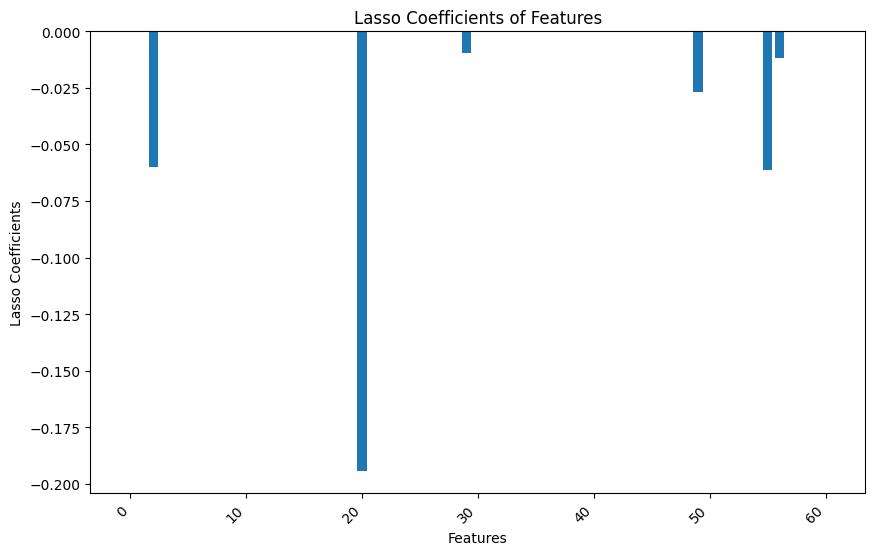

In [ ]:
# Lasso
lasso_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
train_feature_lasso, test_feature_lasso,coefficients = lasso_model.lasso()

In [ ]:
# Assuming you have instances of your Classifier class named knn, lda, decision_tree
svm = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
knn = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
lda = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
decision_tree = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)

# Function to save models with different regularizers
def save_model_with_regularizer(classifier, reg_type, model_name, file_suffix):
    # base_path = 'C:\\Users\\iit\\Downloads\\'
    base_path = '/content/drive/MyDrive/Datasets/Results/'
    saver = Saver(classifier(), reg_type, model_name, base_path + file_suffix)
    saver.save()

# Lasso regularizer
save_model_with_regularizer(svm.svm, 'Lasso', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'Lasso', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'Lasso', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'Lasso', 'Decision Tree', 'dt_regularizers.xlsx')

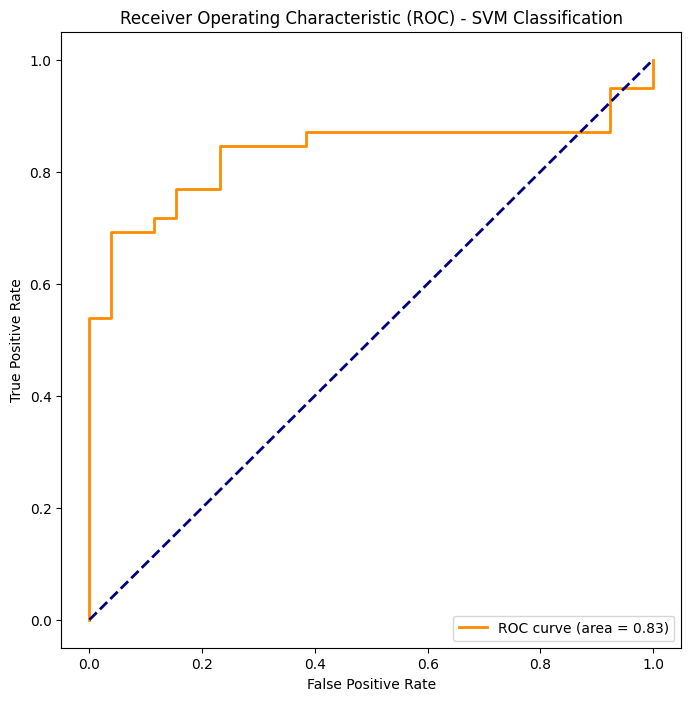

{'Accuracy': 0.7846153846153846,
 'Precision': 0.8571428571428571,
 'Recall': 0.7692307692307693,
 'f-score': 0.8108108108108107,
 'ROC-AUC': 0.8333333333333333}

In [ ]:
# Assuming you have instances of your Classifier class named knn, lda, decision_tree
svm = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
knn = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
lda = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
decision_tree = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
svm.svm()

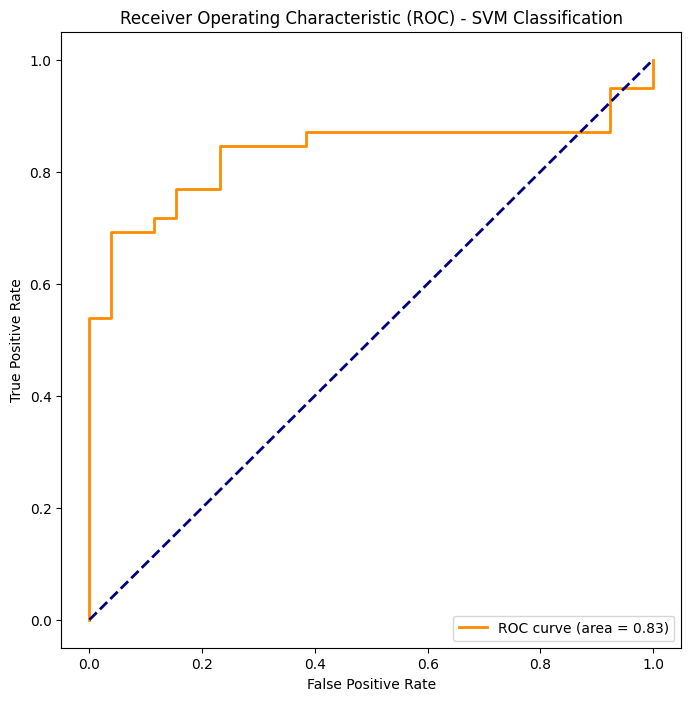

Results saved to /content/drive/MyDrive/Datasets/Results/svm_lasso.xlsx


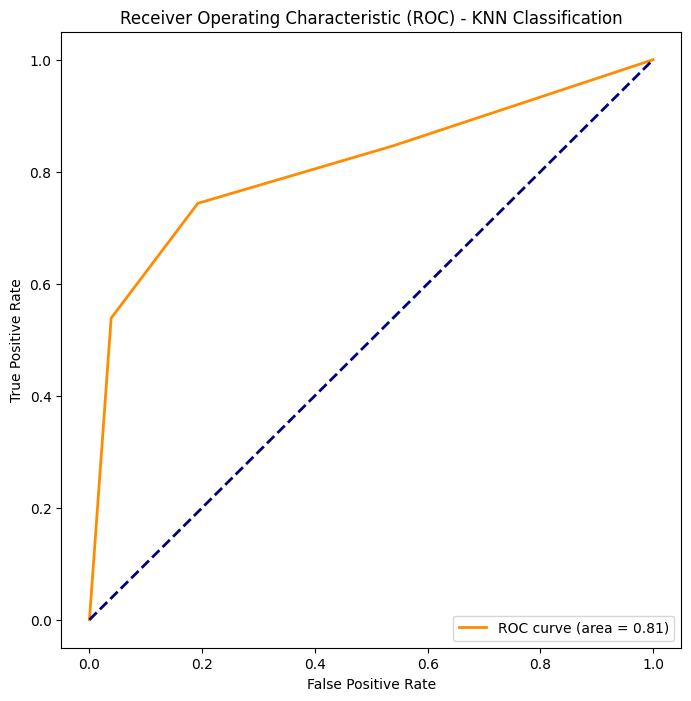

Results saved to /content/drive/MyDrive/Datasets/Results/knn_lasso.xlsx


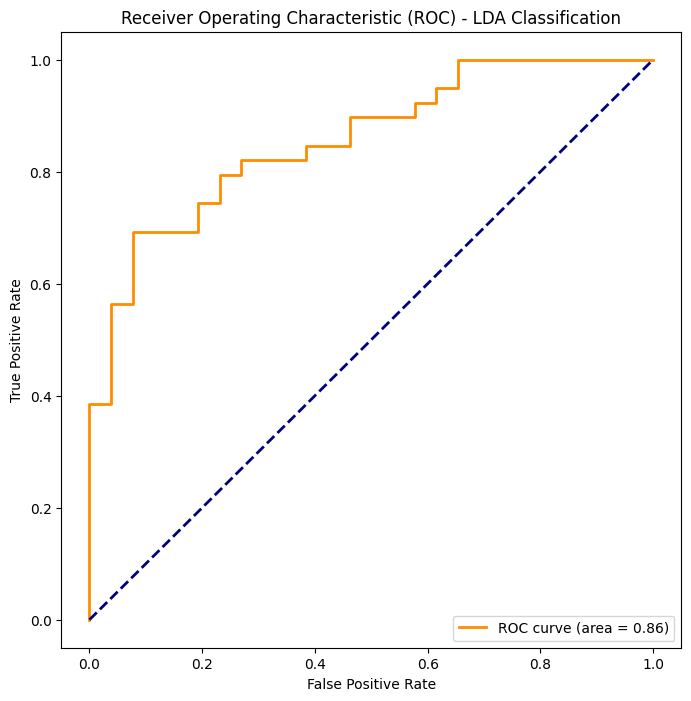

Results saved to /content/drive/MyDrive/Datasets/Results/lda_lasso.xlsx


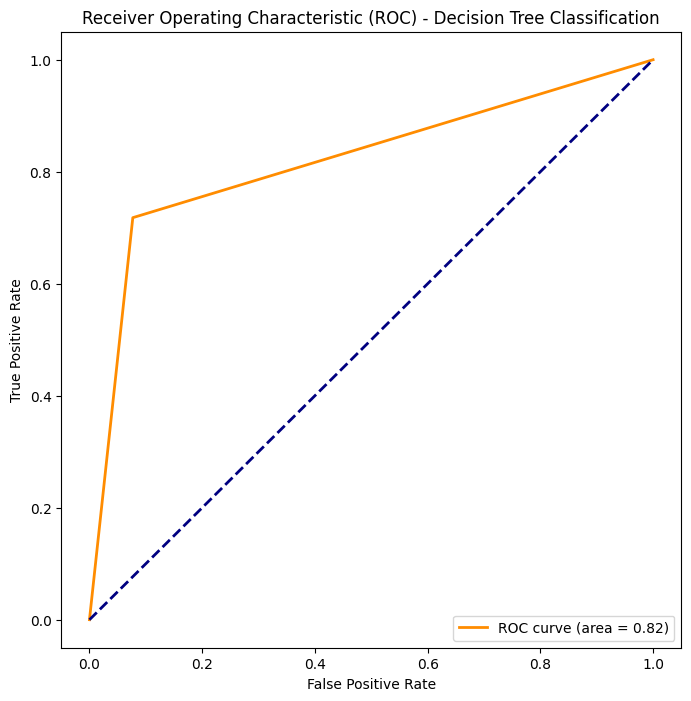

Results saved to /content/drive/MyDrive/Datasets/Results/dt_lasso.xlsx


In [ ]:
# Assuming you have instances of your Classifier class named svm, knn, lda, decision_tree
# knn = Classifier(X_train, X_test, y_train, y_test)
svm = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
knn = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
lda = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
decision_tree = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
#lasso_svm = Saver(svm.svm(), 'Lasso', 'SVM', 'C:\\Users\\iit\\Downloads\\svm.xlsx')
lasso_svm = Saver(svm.svm(), 'Lasso', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_lasso.xlsx')
lasso_svm.save()

#lasso_knn = Saver(knn.knn(), 'Lasso', 'KNN', 'C:\\Users\\iit\\Downloads\\knn.xlsx')
lasso_knn = Saver(knn.knn(), 'Lasso', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_lasso.xlsx')
lasso_knn.save()

#lasso_lda = Saver(lda.lda(), 'Lasso', 'LDA', 'C:\\Users\\iit\\Downloads\\lda.xlsx')
lasso_lda = Saver(lda.lda(), 'Lasso', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_lasso.xlsx')
lasso_lda.save()

#lasso_dt = Saver(decision_tree.decision_tree(), 'Lasso', 'Decision Tree', 'C:\\Users\\iit\\Downloads\\dt.xlsx')
lasso_dt = Saver(decision_tree.decision_tree(), 'Lasso', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_lasso.xlsx')
lasso_dt.save()

In [ ]:
# Calculate the number of non-zero columns
num_non_zero_train = (train_feature_lasso != 0).sum(axis=0)
num_non_zero_test = (test_feature_lasso != 0).sum(axis=0)
# Print the results
print("Number of non-zero columns for training data:")
print(num_non_zero_train)
print("\nNumber of non-zero columns for test data:")
print(num_non_zero_test)

# Total number of non-zero columns
total_non_zero_train = (num_non_zero_train != 0).sum()
total_non_zero_test = (num_non_zero_test != 0).sum()

print("\nTotal number of non-zero columns for training data:", total_non_zero_train)
print("\nTotal number of non-zero columns for test data:", total_non_zero_test)
components= total_non_zero_train
print(type(train_feature_lasso))
print(type(components))
lasso_features=train_feature_lasso.iloc[:,coefficients!=0]
lasso_features

Number of non-zero columns for training data:
0       0
1       0
2     259
3       0
4       0
     ... 
56    259
57      0
58      0
59      0
60      0
Length: 61, dtype: int64

Number of non-zero columns for test data:
0      0
1      0
2     65
3      0
4      0
      ..
56    65
57     0
58     0
59     0
60     0
Length: 61, dtype: int64

Total number of non-zero columns for training data: 6

Total number of non-zero columns for test data: 6
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.int64'>


,2,20,29,49,55,56
0,0.024977,0.170218,0.005775,0.021873,0.033462,0.009076
1,0.024977,0.170218,0.001550,0.021873,0.033462,0.000981
2,0.024977,0.074643,-0.002675,0.012408,0.033462,0.002600
3,0.024977,0.170218,0.005775,0.021873,0.033462,0.009076
4,0.024977,0.170218,0.005775,0.021873,0.033462,0.009076
...,...,...,...,...,...,...
254,0.024977,0.170218,0.005775,0.021873,0.024890,0.005838
255,-0.120653,0.008226,-0.004788,-0.031217,-0.017972,-0.011969
256,0.024977,0.170218,-0.004788,0.021873,-0.043689,-0.008732
257,0.024977,0.170218,0.005775,0.021873,0.033462,0.009076


In [ ]:
print(type(components))

<class 'numpy.int64'>


In [ ]:
components

4

In [ ]:
lasso_features
#[32, 51, 3, 15, 38, 45, 41, 48, 57, 47]

,11,28,38,41
0,0.016127,0.170495,0.056123,0.124100
1,-0.023983,-0.084210,-0.018846,-0.212582
2,0.016127,-0.079064,-0.018846,0.124100
3,0.016127,0.162776,0.056123,0.124100
4,0.016127,-0.084210,-0.018846,0.460782
...,...,...,...,...
118808,0.016127,-0.081637,-0.018846,-0.212582
118809,0.016127,-0.084210,-0.018846,-0.212582
118810,0.016127,-0.084210,-0.018846,-0.212582
118811,0.016127,-0.084210,-0.018846,0.797464


In [ ]:
print(type(train_feature_lasso))
print(train_feature_lasso)

<class 'pandas.core.frame.DataFrame'>
         0    1    2    3    4    5    6    7    8    9   ...   32   33   34  \
0      -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ... -0.0 -0.0  0.0   
1      -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ... -0.0 -0.0 -0.0   
2      -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ... -0.0 -0.0 -0.0   
3      -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ...  0.0  0.0 -0.0   
4      -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ...  0.0  0.0 -0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
118808 -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ...  0.0  0.0  0.0   
118809 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ...  0.0  0.0 -0.0   
118810 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ... -0.0  0.0 -0.0   
118811 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  ...  0.0  0.0 -0.0   
118812 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ... -0.0 -0.0 -0.0   

 

In [ ]:
###BOXPLOT LASSO###

# BOX PLOT LASSO

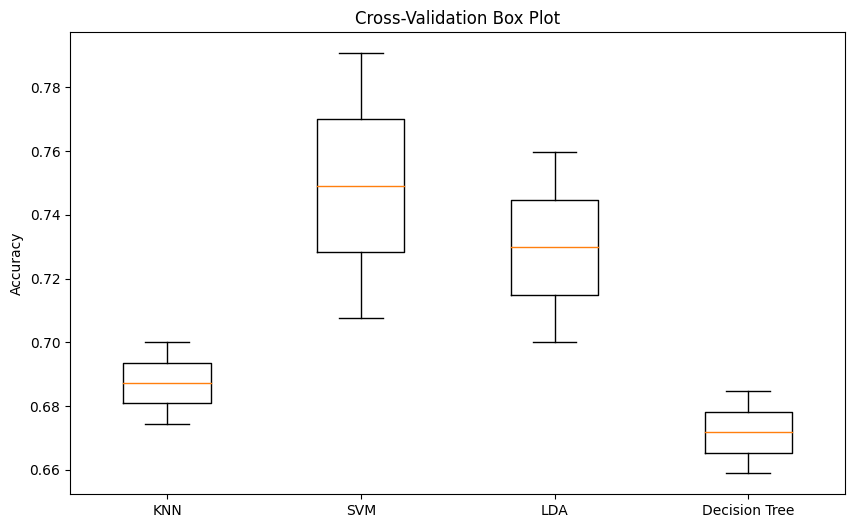

In [ ]:
# Assuming X and y are your features and target variable, respectively
clf = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)

# Plot cross-validation box plot
clf.plot_cross_val_boxplot(models_to_cross_validate)

# # ROC-AUC plot for each model
# for model_name, model in models_to_cross_validate:
#     probabilities = model.fit(clf.X_train, clf.y_train).predict_proba(clf.X_test)[:, 1]
#     clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')

# # Create a box plot of the cross-validation scores
# plt.figure(figsize=(10, 6))
# plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
# plt.title('Cross-Validation Box Plot using Lasso Regression')
# plt.ylabel('Accuracy')
# plt.show()


# Radar plot for each model

# def cross_validate_models(self, models, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
#     scores_dict = {}

#     for model_name, model in models:
#         scores = cross_val_score(model, self.X_train, self.y_train, cv=cv, scoring='accuracy')
#         scores_dict[model_name] = scores

#     return scores_dict

In [ ]:
# Assuming you have results_df and scores_df from the cross-validation
results_df, scores_df = clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)

# Radar plot for each model
plt.figure(figsize=(12, 8))
clf.plot_radar(results_df, title_suffix="Radar Plot")


ValueError: ignored

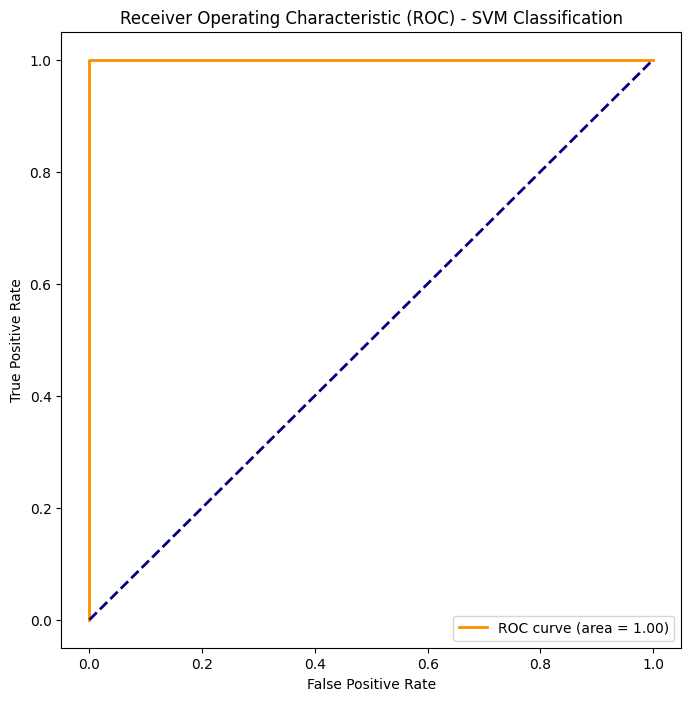

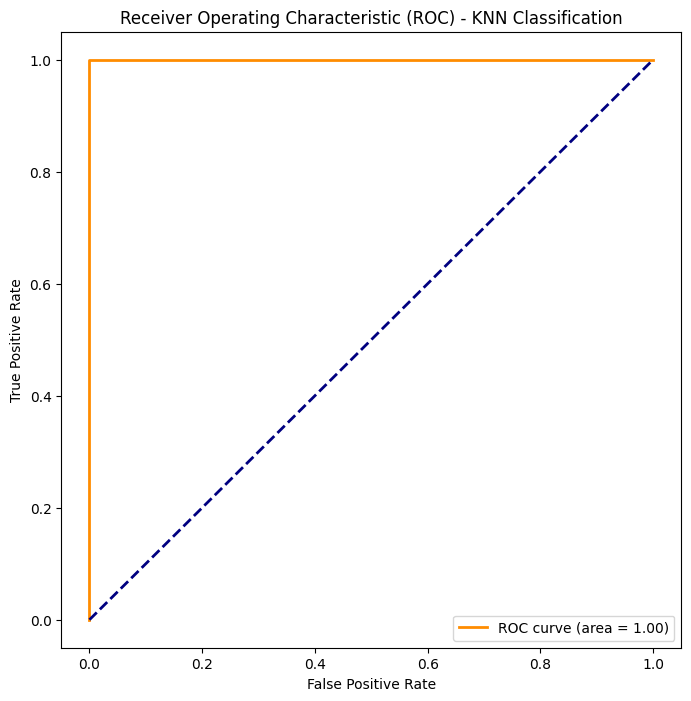

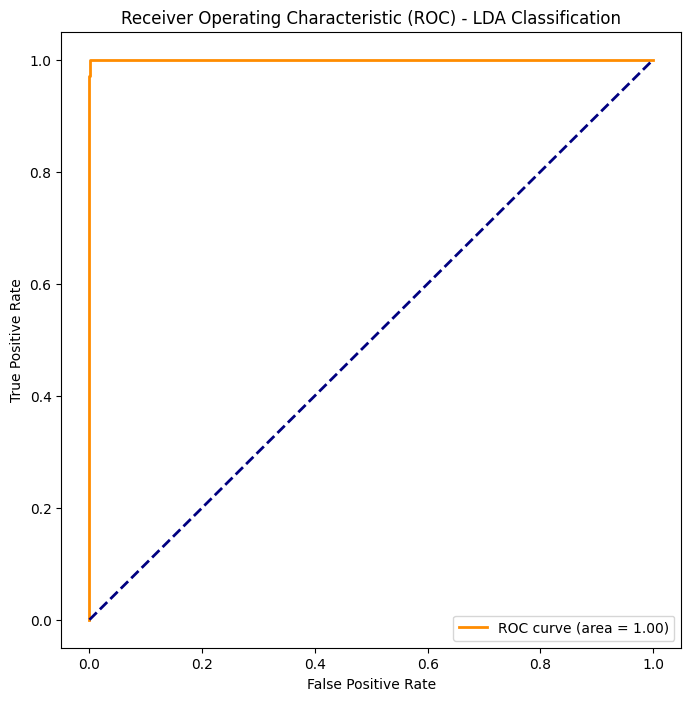

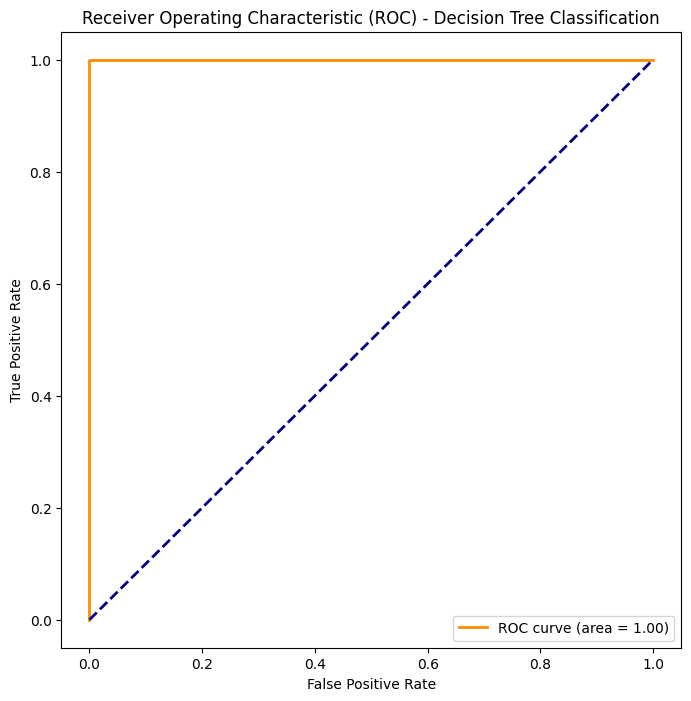

In [ ]:
#Lasso reggressed Classifier Fine
clasification = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
# cv=new_obj.cross_validate()
d_svm = clasification.svm()
d_knn = clasification.knn()
d_lda = clasification.lda()
d_dt = clasification.decision_tree()


In [ ]:
#RADAR PLOT
results_dict= clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)
plt.figure(figsize=(12, 8))
for model_name, model in models_to_cross_validate:
    # results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
    print(f"Type of results_dict for {model_name}: {type(results_dict)}")
    print(f"Content of results_dict for {model_name}: {results_dict}")
    results_dict, results_df = clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)

    clf.plot_radar(results_dict, title_suffix=f'{model_name} - Radar')

# # Scatter plot for each model
# plt.figure(figsize=(12, 8))
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
#     clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')


# plt.tight_layout()
# plt.show()


# Ridge

In [ ]:
#Ridge
ridge_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
train_feature_ridge,test_feature_ridge = ridge_model.ridge()

Best alpha: 10.0
           0         1         2         3         4         5         6   \
0    0.022249  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   
1    0.009093  0.012418  0.071331 -0.078847 -0.000223  0.049057  0.022087   
2    0.022249  0.012418  0.071331 -0.036391 -0.000223  0.049057  0.018504   
3    0.022249  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   
4    0.022249  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   
..        ...       ...       ...       ...       ...       ...       ...   
254  0.022249  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   
255  0.022249  0.012418 -0.344573  0.006065 -0.000223  0.049057  0.017745   
256  0.009093  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   
257  0.022249  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   
258  0.022249  0.012418  0.071331 -0.057619 -0.000223  0.049057  0.022087   

          7         8         9   ...        51        52 

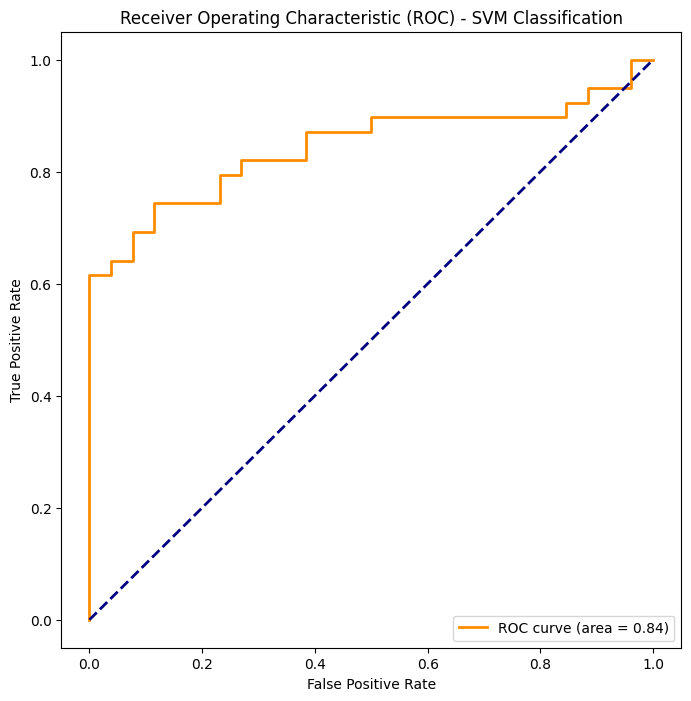

Results saved to /content/drive/MyDrive/Datasets/Results/svm_regularizers.xlsx


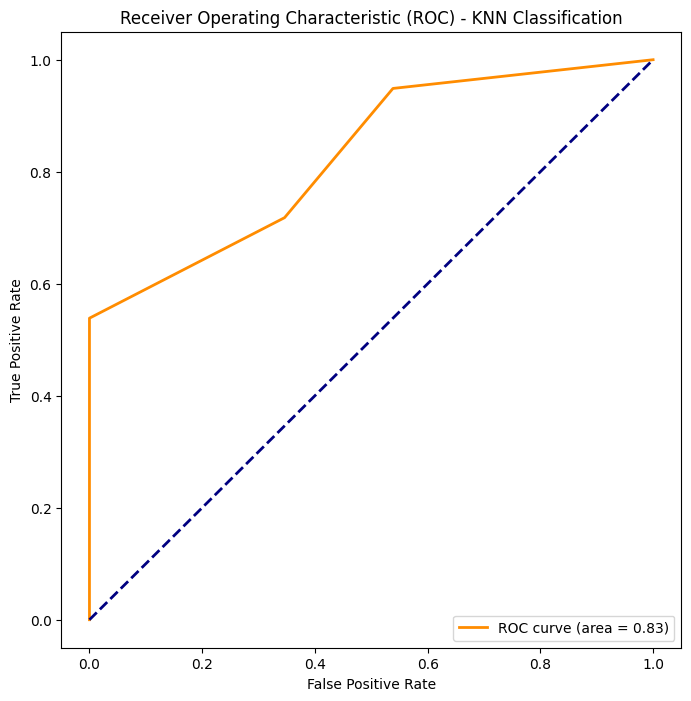

Results saved to /content/drive/MyDrive/Datasets/Results/knn_regularizers.xlsx


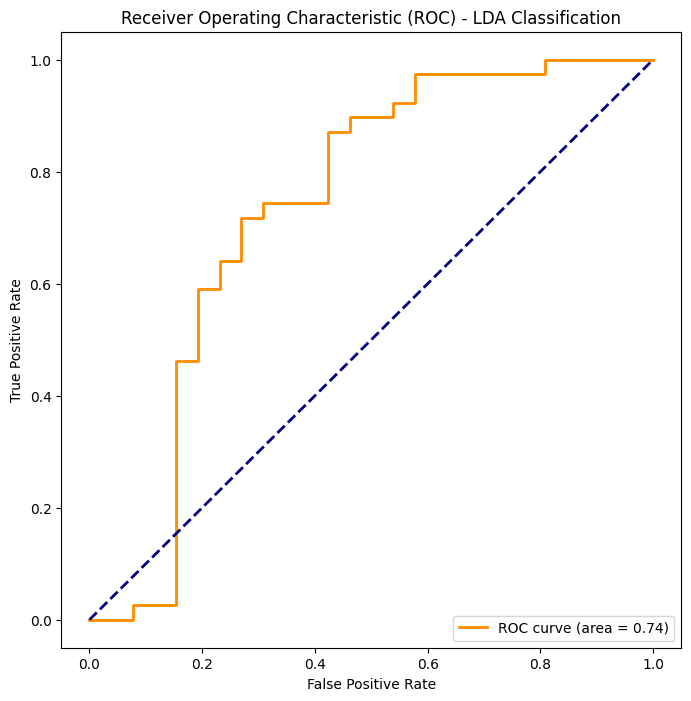

Results saved to /content/drive/MyDrive/Datasets/Results/lda_regularizers.xlsx


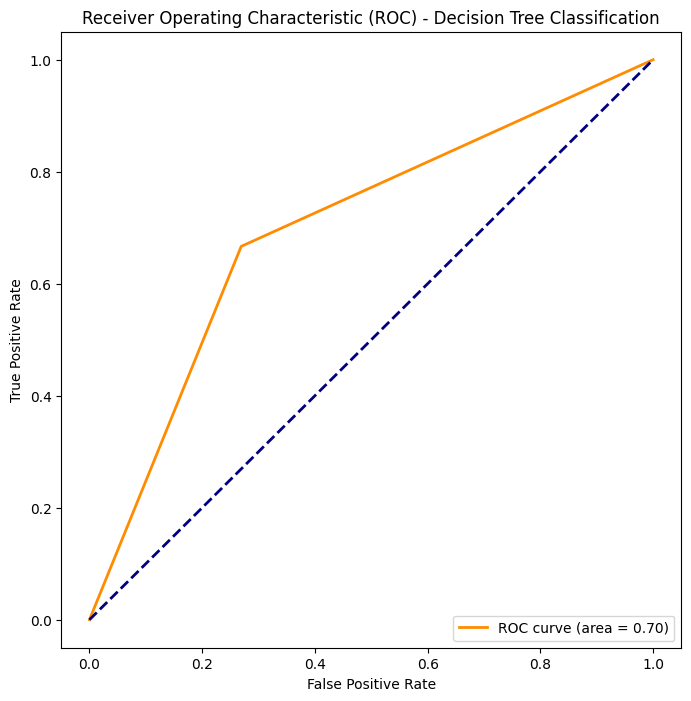

Results saved to /content/drive/MyDrive/Datasets/Results/dt_regularizers.xlsx


In [ ]:
# Assuming you have instances of your Classifier class named knn, lda, decision_tree
svm = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
knn = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
lda = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
decision_tree = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

# Function to save models with different regularizers
def save_model_with_regularizer(classifier, reg_type, model_name, file_suffix):
    # base_path = 'C:\\Users\\iit\\Downloads\\'
    base_path = '/content/drive/MyDrive/Datasets/Results/'
    saver = Saver(classifier(), reg_type, model_name, base_path + file_suffix)
    saver.save()

# Ridge regularizer
save_model_with_regularizer(svm.svm, 'Ridge', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'Ridge', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'Ridge', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'Ridge', 'Decision Tree', 'dt_regularizers.xlsx')

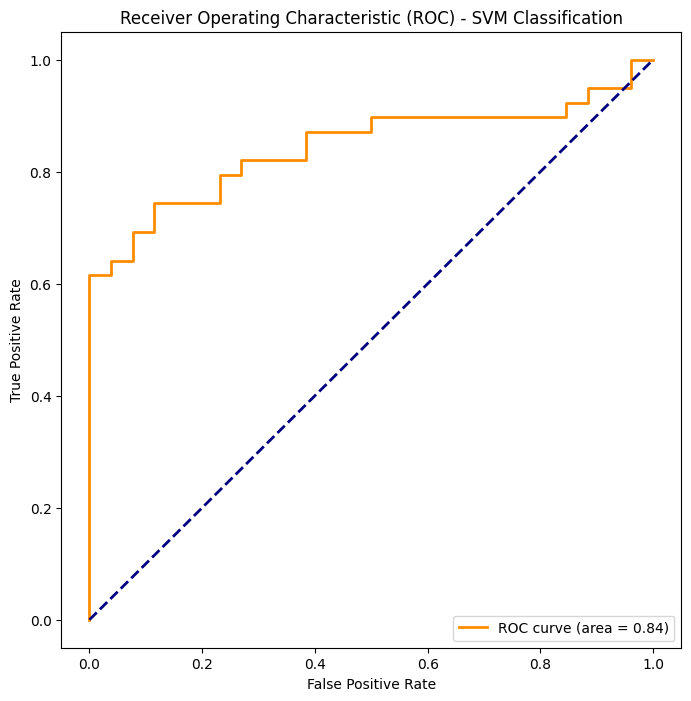

Results saved to /content/drive/MyDrive/Datasets/Results/svm_ridge.xlsx


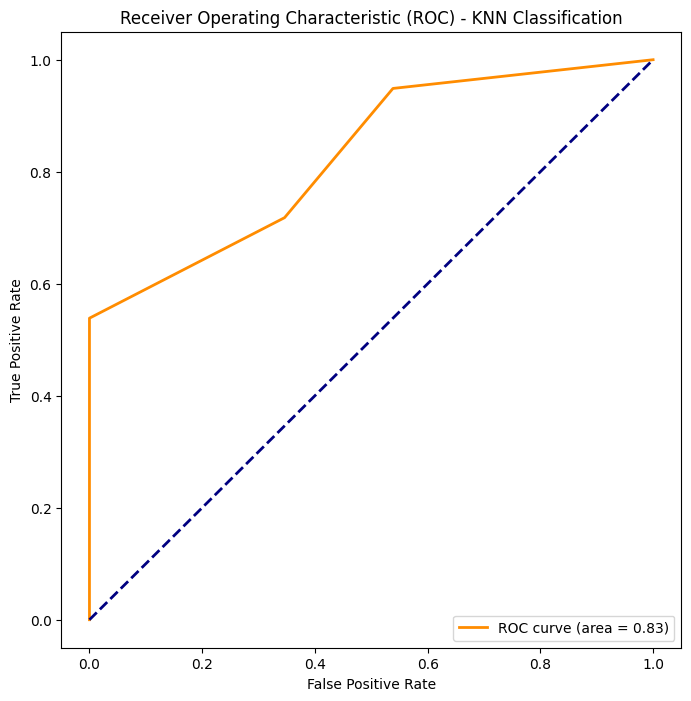

Results saved to /content/drive/MyDrive/Datasets/Results/knn_ridge.xlsx


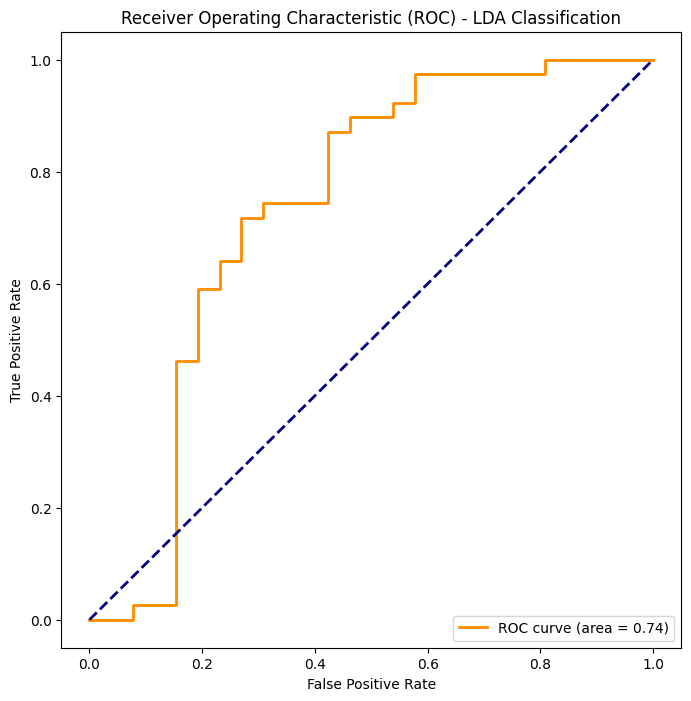

Results saved to /content/drive/MyDrive/Datasets/Results/lda_ridge.xlsx


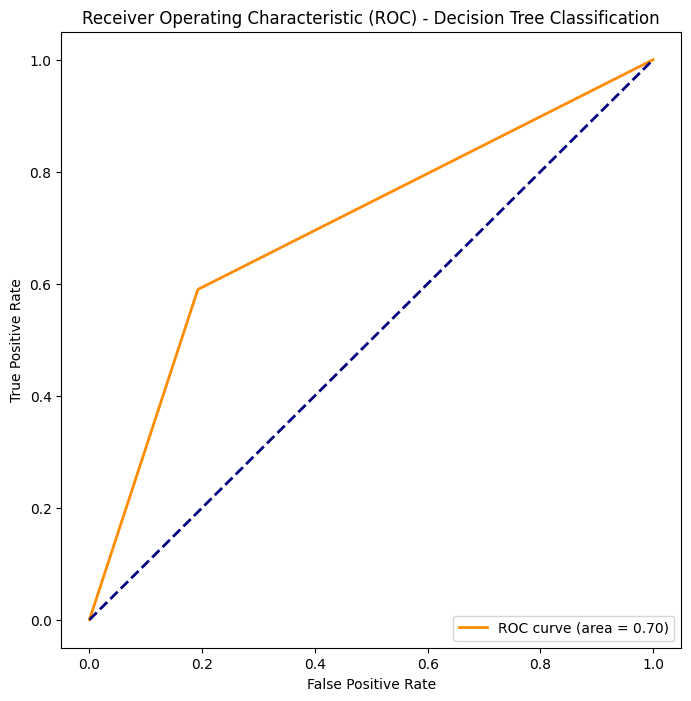

Results saved to /content/drive/MyDrive/Datasets/Results/dt_ridge.xlsx


In [ ]:
# have instances of Classifier class named svm, knn, lda, decision_tree
svm = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
knn = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
lda = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
decision_tree = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
# Ridge regularizer
ridge_svm = Saver(svm.svm(), 'Ridge', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_ridge.xlsx')

ridge_svm.save()

ridge_knn = Saver(knn.knn(), 'Ridge', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_ridge.xlsx')
ridge_knn.save()

ridge_lda = Saver(lda.lda(), 'Ridge', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_ridge.xlsx')
ridge_lda.save()

ridge_dt = Saver(decision_tree.decision_tree(), 'Ridge', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_ridge.xlsx')
ridge_dt.save()

In [ ]:
train_feature_ridge = pd.DataFrame(train_feature_ridge)
print(type(train_feature_ridge))
# X_train_ridge, X_test_ridge

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# train_feature_ridge = train_feature_ridge[lasso_features.columns]
# test_feature_ridge = test_feature_ridge[lasso_features.columns]

In [ ]:
train_feature_ridge
print(type(train_feature_ridge))
print(type(test_feature_ridge))
print(train_feature_ridge.shape)
#[32, 51, 3, 15, 38, 45, 41, 48, 57, 47]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(118813, 42)


In [ ]:
print(type(train_feature_ridge))
train_feature_ridge = train_feature_ridge.iloc[:, :components].copy()
test_feature_ridge = test_feature_ridge.iloc[:, :components].copy()
print(train_feature_ridge.shape)  # This will print the shape to verify the dimensions
print(test_feature_ridge.shape)

train_feature_ridge

<class 'pandas.core.frame.DataFrame'>
(118813, 4)
(29704, 4)


,0,1,2,3
0,-0.000051,-0.037555,0.000285,0.000181
1,-0.000051,-0.037555,-0.000058,-0.000336
2,-0.000051,0.116097,-0.000066,-0.000336
3,-0.000051,-0.037555,-0.000066,0.000181
4,0.005740,-0.037555,-0.000066,0.001214
...,...,...,...,...
118808,-0.000051,0.116097,0.000007,-0.000336
118809,-0.000051,0.116097,0.000007,-0.000336
118810,-0.000051,0.116097,0.000007,-0.000336
118811,-0.000051,-0.037555,-0.000009,-0.000336


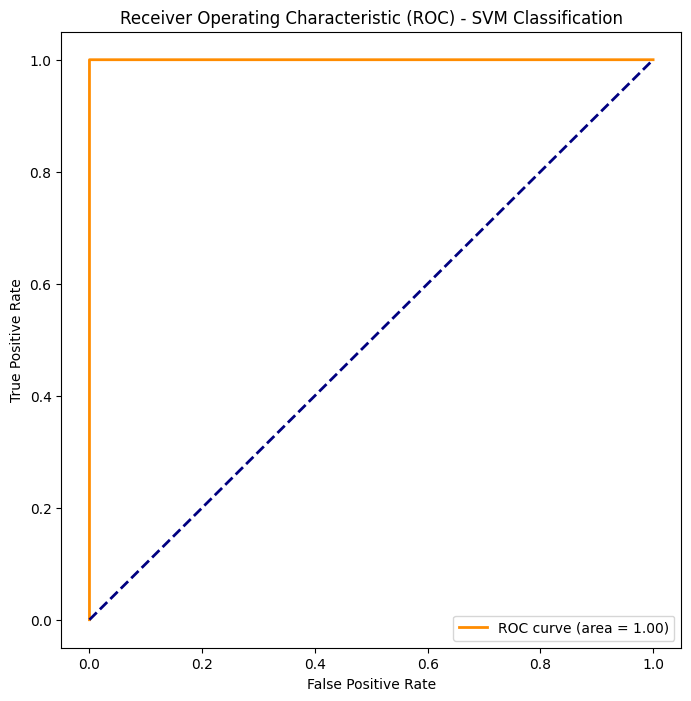

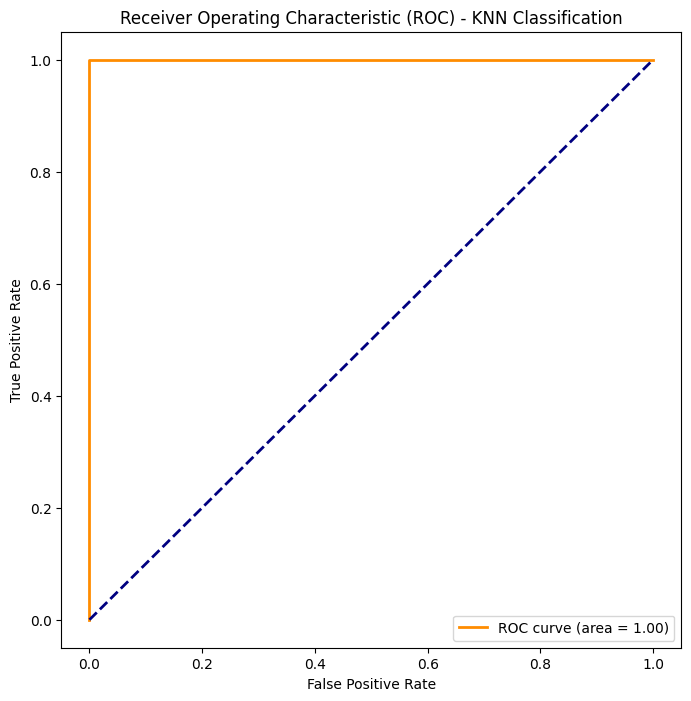

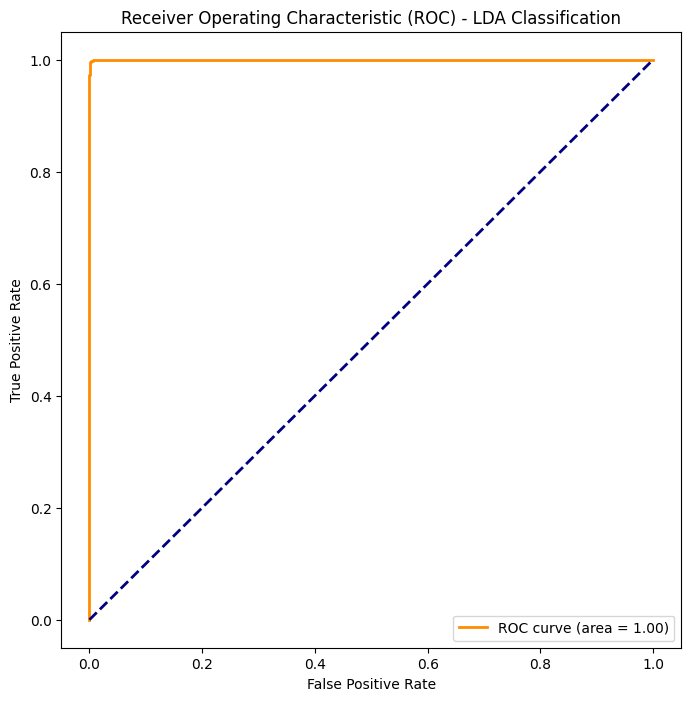

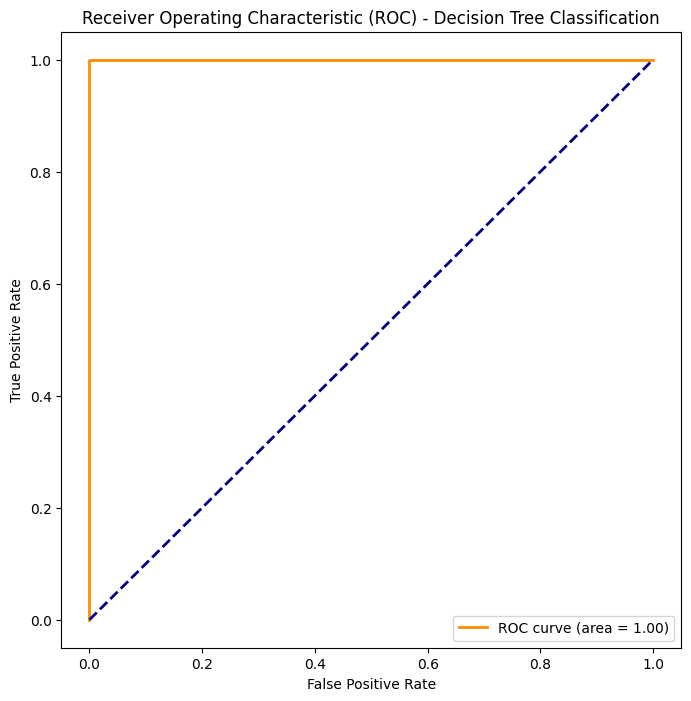

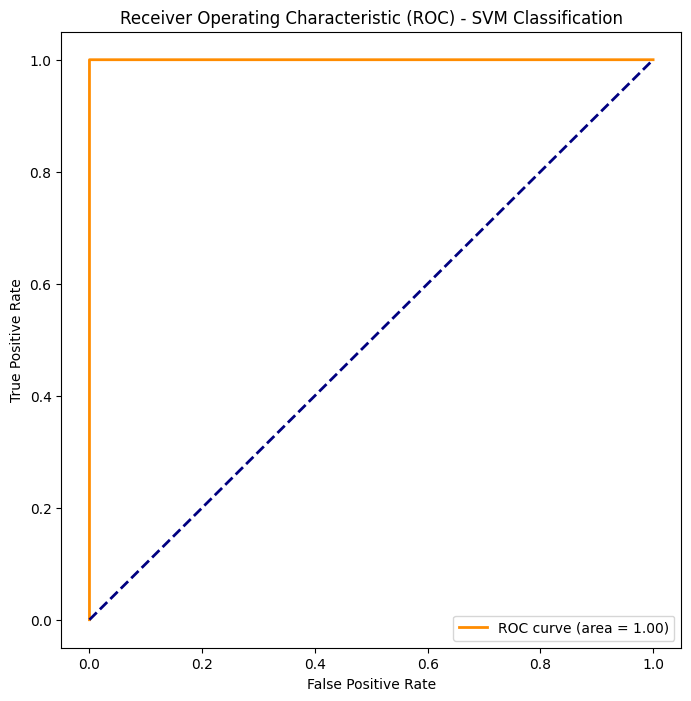

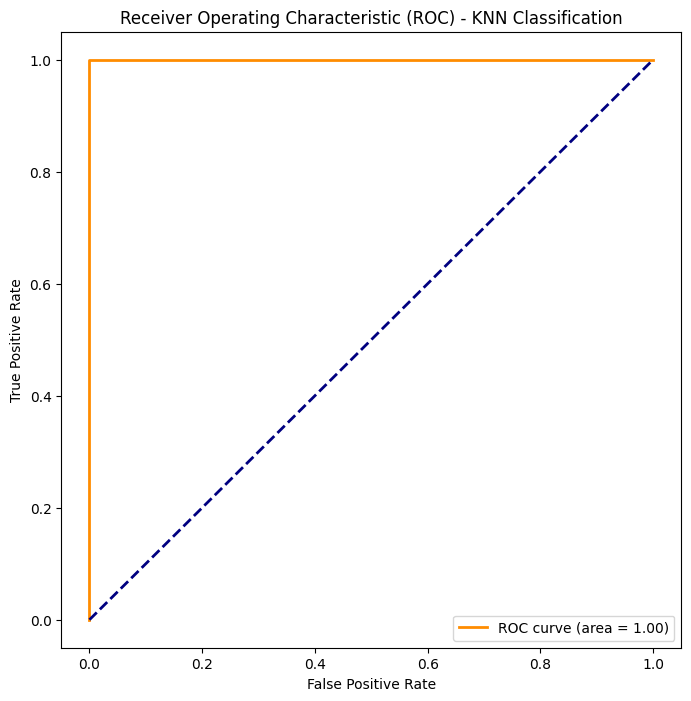

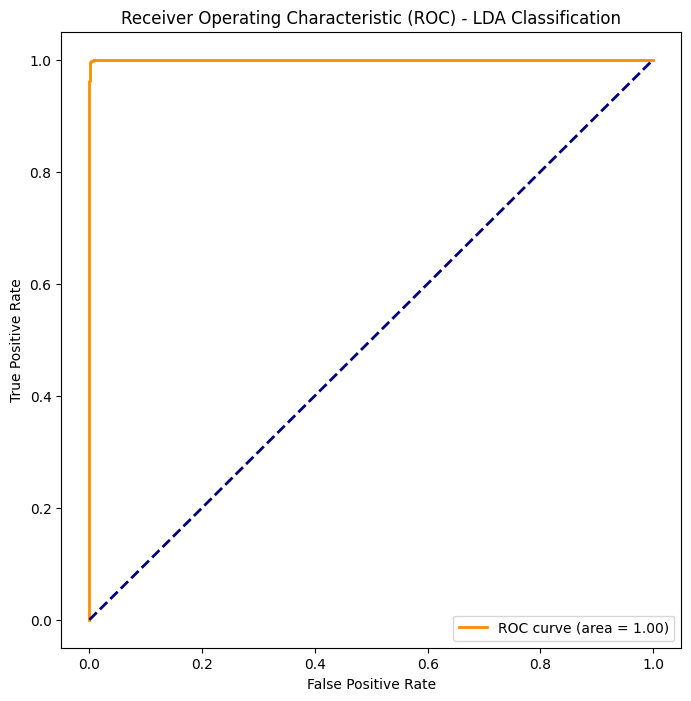

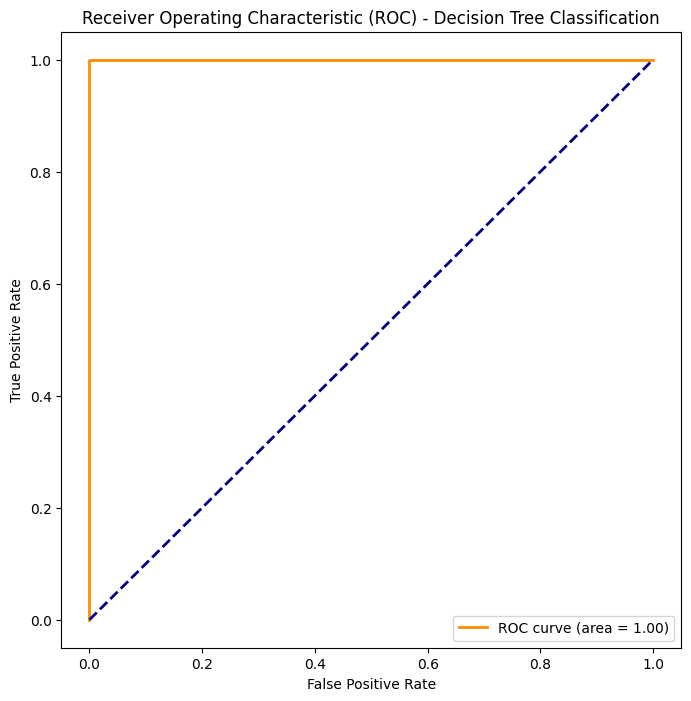

In [ ]:
# have instances of Classifier class named svm, knn, lda, decision_tree
svm = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
knn = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
lda = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
decision_tree = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

clasification = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
d_svm = clasification.svm()
d_knn = clasification.knn()
d_lda = clasification.lda()
d_dt = clasification.decision_tree()

# RIDGE Box Plot

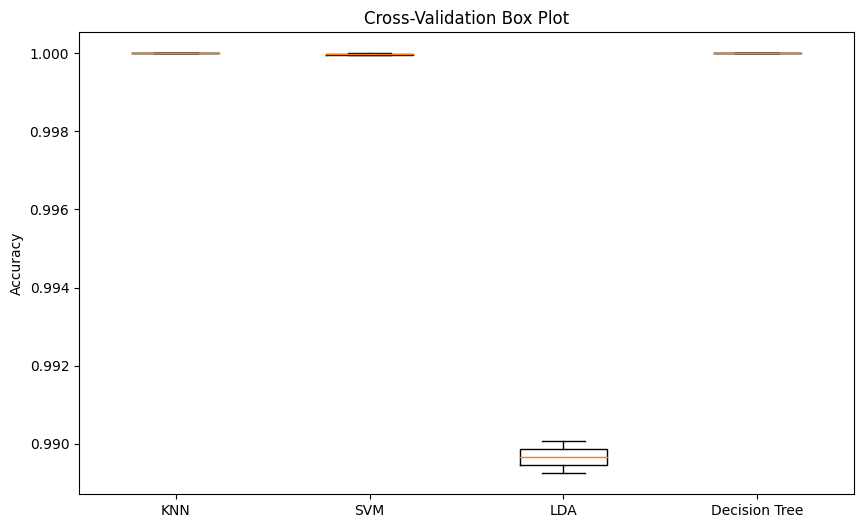

In [ ]:
# Example usage:
# Assuming X_train, X_test, y_train, y_test are your features and target variable, respectively
clf = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_ridge, y_train, models_to_cross_validate)

# Plot cross-validation box plot
clf.plot_cross_val_boxplot(models_to_cross_validate)

# # Create a box plot of the cross-validation scores
# plt.figure(figsize=(10, 6))
# plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
# plt.title('Box Plot using Ridge Regression')
# plt.ylabel('Accuracy')
# plt.show()

# # ROC-AUC plot for each model
# for model_name, model in models_to_cross_validate:
#     probabilities = model.fit(clf.X_train, clf.y_train).predict_proba(clf.X_test)[:, 1]
#     clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')

# cross_val_scores = clf.cross_validate_models(models_to_cross_validate)
# # Radar plot for each model
# plt.figure(figsize=(12, 8))
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])
#     print(f"Type of results_dict for {model_name}: {type(results_dict)}")
#     print(f"Content of results_dict for {model_name}: {results_dict}")
#     clf.plot_radar(results_dict, title_suffix=f'{model_name} - Radar')

# # Scatter plot for each model
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
#     clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')

# plt.tight_layout()
# plt.show()

# RIDGE PLOT

In [ ]:
# Assuming X and y are your features and target variable, respectively
clf = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_ridge,y_train, models_to_cross_validate)

# Create a box plot of the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
plt.title('Cross-Validation Box Plot using Ridge Regression')
plt.ylabel('Accuracy')
plt.show()

NameError: ignored

# Partial Least Square(PLS)

In [ ]:
##PLS CLASSIFIER WITH IMPUTER EMBEDDED THAT returns train_feature_pls
# Assuming you have X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled defined
pls_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
train_feature_pls, test_feature_pls = pls_model.pls(4)

print(type(train_feature_pls))
print(type(test_feature_pls))
train_feature_pls

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
0,3.681071,-0.642724,0.882781,-1.471756
1,-2.712964,-0.808471,0.440243,0.588270
2,0.585664,2.694428,1.629731,2.058614
3,2.925696,-0.566758,1.083082,-1.001601
4,2.832688,1.454414,-3.272356,2.217973
...,...,...,...,...
118808,-1.745058,0.058499,-0.612840,-0.938004
118809,-1.745058,0.058499,-0.612840,-0.938004
118810,-1.522672,0.228132,-0.820855,-1.082763
118811,1.172214,3.039257,2.310149,1.519483


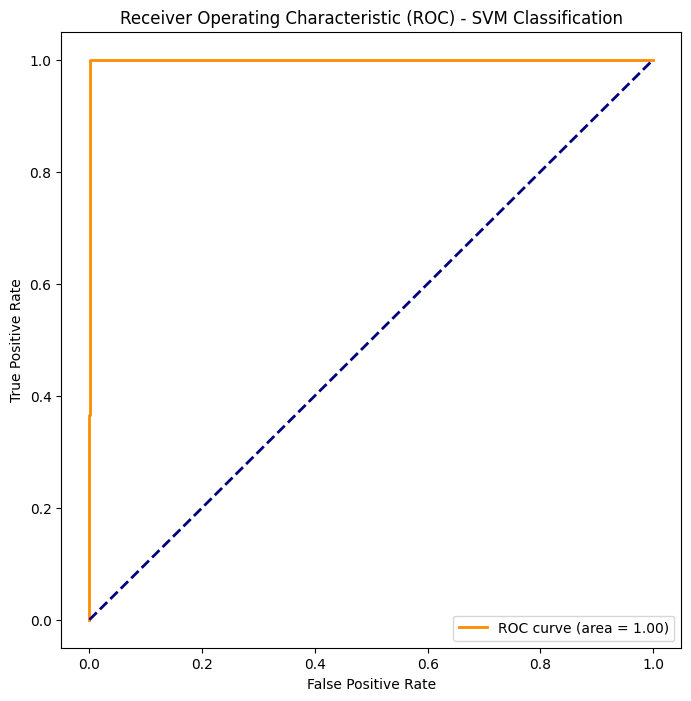

Results saved to /content/drive/MyDrive/Datasets/Results/svm_pls.xlsx


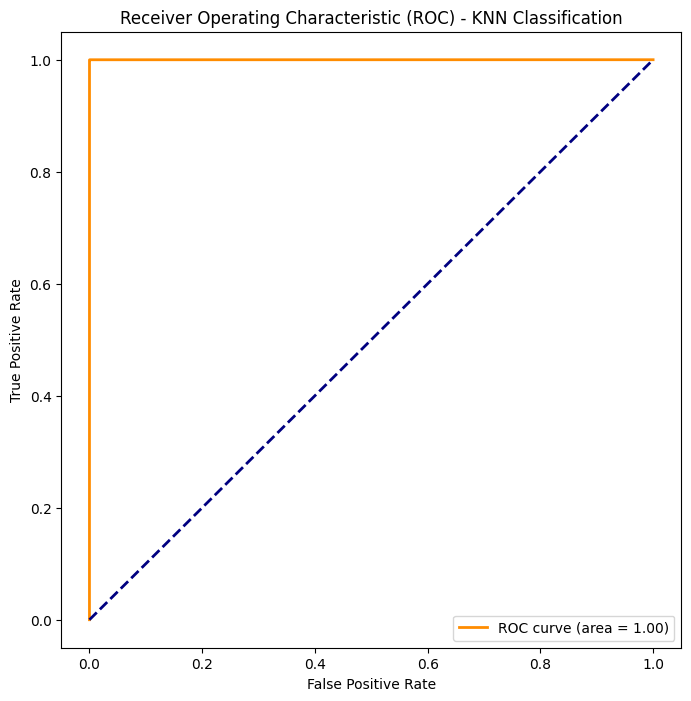

Results saved to /content/drive/MyDrive/Datasets/Results/knn_pls.xlsx


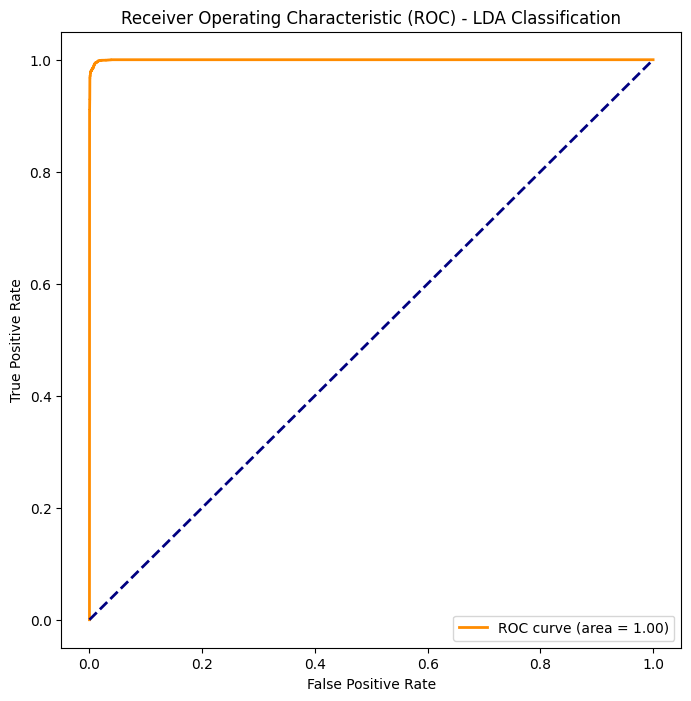

Results saved to /content/drive/MyDrive/Datasets/Results/lda_pls.xlsx


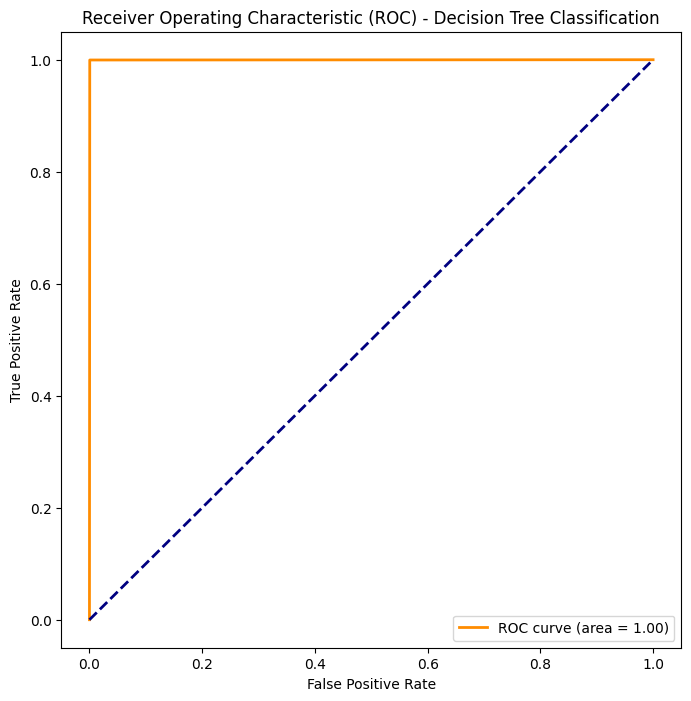

Results saved to /content/drive/MyDrive/Datasets/Results/dt_pls.xlsx


In [ ]:
# have instances of Classifier class named svm, knn, lda, decision_tree
svm = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
knn = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
lda = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
decision_tree = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
# PLS regularizer
pls_svm = Saver(svm.svm(), 'PLS', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_pls.xlsx')
pls_svm.save()

pls_knn = Saver(knn.knn(), 'PLS', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_pls.xlsx')
pls_knn.save()

pls_lda = Saver(lda.lda(), 'PLS', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_pls.xlsx')
pls_lda.save()

pls_dt = Saver(decision_tree.decision_tree(), 'PLS', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_pls.xlsx')
pls_dt.save()

# C:\\Users\\iit\\Downloads\\

In [ ]:
train_feature_pls
test_feature_pls

In [ ]:
#FOR THE COMMENTED REGULARIER CODE THAT RETURNS WEIGHTS WITHOUT IMPUTE
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
print(type(X_train_scaled))
print(type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# n_components=components


In [ ]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.351117,-0.211879,-0.439349,-0.527439,-0.285050,-0.423848,-0.364391,-0.115336,-0.487176,-0.351489,...,-0.525627,-0.498711,0.284182,-0.374997,-0.248166,-0.623399,-0.575401,-0.455123,-0.633156,-0.208433
1,-0.351117,-0.384940,-0.439349,-0.286722,-0.285050,-0.423848,-0.336911,-0.330188,-0.487176,-0.351489,...,-0.301163,-0.498711,-0.628417,-0.451622,0.063093,0.032944,-0.575401,-0.455123,-0.613630,-0.390125
2,-0.351117,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.475298,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.403795,-0.492130,-0.575401,-0.455123,-0.635966,-0.390125
3,-0.039147,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.413109,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,0.040612,-0.451622,-0.559424,0.426749,-0.575401,-0.455123,-0.621879,-0.390125
4,-0.195132,-0.228188,0.129858,-0.166364,-0.285050,0.060870,-0.315439,-0.097382,0.731912,-0.108140,...,-0.188931,-0.357261,1.208036,-0.371980,0.996869,-0.229593,-0.139270,-0.278348,-0.615353,-0.240256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2.924572,3.090792,1.497987,5.851555,5.992127,7.374835,3.626600,1.453257,2.533784,1.831548,...,5.983830,6.604618,0.502089,5.079999,0.218722,0.951823,5.940594,5.340661,2.900759,3.351704
255,0.740779,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.475298,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.559424,-0.623399,-0.575401,-0.455123,-0.635966,-0.390125
256,-0.351117,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.475298,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.559424,-0.754667,-0.575401,-0.455123,-0.635966,-0.390125
257,-0.351117,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.435577,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.170351,0.164212,-0.575401,-0.455123,-0.630237,-0.390125


In [ ]:
#PLS
pls_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
feature_weights = pls_model.pls()
df = pd.DataFrame(feature_weights)
feature_weights=df

# train_feature_pls = X_train_scaled * feature_weights.T
# test_feature_pls = X_test_scaled * feature_weights.T
#df = train_feature_pls.dropna(how='any',axis=0)
#df

feature_weights

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,0 1 2 3 ...
1,0 1 2 3 ...


In [ ]:
print(type(feature_weights))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_feature_pls = X_train_scaled * feature_weights
test_feature_pls = X_test_scaled * feature_weights
print(type(train_feature_pls))
train_feature_pls
test_feature_pls

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0 1 2 3 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 1 2 3 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer
# Assuming X is your input data
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(train_feature_pls)
X_test_imputed=imputer.fit_transform(test_feature_pls)
print(type(X_imputed))

train_feature_pls = pd.DataFrame(X_imputed)
test_feature_pls = pd.DataFrame(X_test_imputed)
print(type(train_feature_pls))
print(type(test_feature_pls))

ValueError: ignored

In [ ]:
# have instances of Classifier class named svm, knn, lda, decision_tree
svm = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
knn = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
lda = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
decision_tree = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
svm
lda

NameError: ignored

# PLS Boxplot

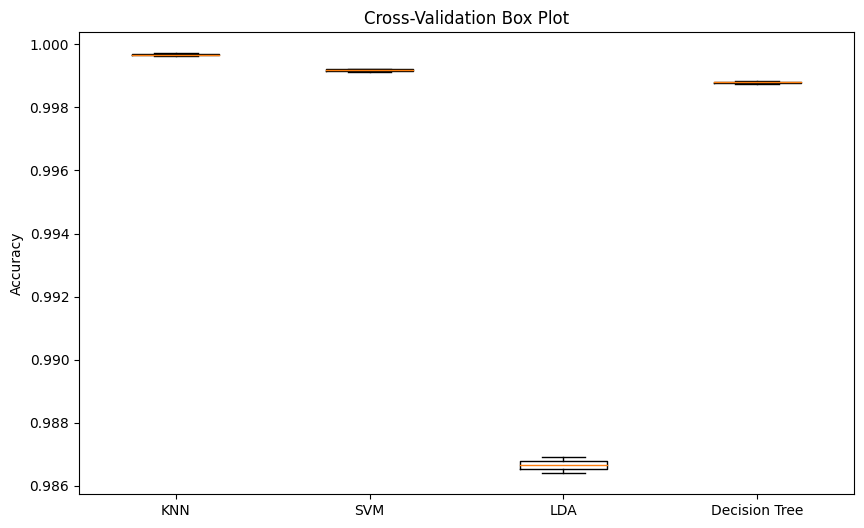

In [ ]:
# PLS BOX PLOT
# Assuming X_train, X_test, y_train, y_test are your features and target variable, respectively
clf = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_pls, y_train, models_to_cross_validate)

# Plot cross-validation box plot
clf.plot_cross_val_boxplot(models_to_cross_validate)
# # Create a box plot of the cross-validation scores
# plt.figure(figsize=(10, 6))
# plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
# plt.title('Box Plot using PLS Regression')
# plt.ylabel('Accuracy')
# plt.show()

# # ROC-AUC plot for each model
# for model_name, model in models_to_cross_validate:
#     probabilities = model.fit(clf.X_train, clf.y_train).predict_proba(clf.X_test)[:, 1]
#     clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')




# # Radar plot for each model
# plt.figure(figsize=(12, 8))
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])
#     print(f"Type of results_dict for {model_name}: {type(results_dict)}")
#     print(f"Content of results_dict for {model_name}: {results_dict}")
#     clf.plot_radar(results_dict, title_suffix=f'{model_name} - Radar')

# # Scatter plot for each model
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
#     clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')

# plt.tight_layout()
# plt.show()

# Mutual Information

In [ ]:
##THE NEW MI REGULARIZER
mi_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
X_selected_train, X_selected_test = mi_model.mutual_information(components=6)
X_selected_train

Int64Index([20, 10, 21, 2, 40, 59], dtype='int64')


,20,10,21,2,40,59
205,0.000000,0.00000,0.0,0.000000,0,0.000000
203,0.000000,0.00000,0.0,0.000000,3,0.000000
263,0.077213,2.99956,0.0,0.000000,6,0.003079
216,0.000000,0.00000,0.0,0.000000,0,0.000000
318,0.000000,0.00000,0.0,0.000000,0,0.000000
...,...,...,...,...,...,...
268,0.000000,0.00000,0.0,0.000000,2,0.000000
183,0.130870,2.67030,0.0,0.007987,27,0.129104
214,0.000000,0.00000,0.0,0.000000,14,0.000000
5,0.000000,0.00000,0.0,0.000000,0,0.000000


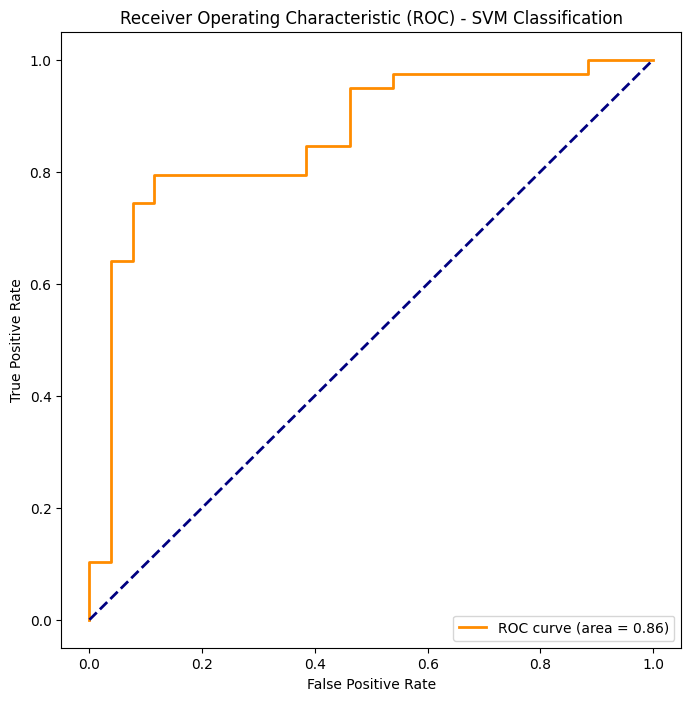

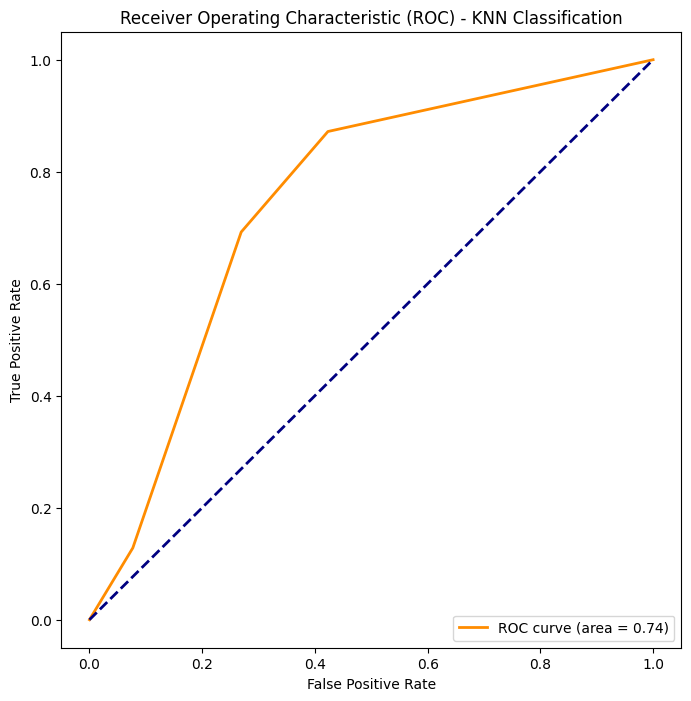

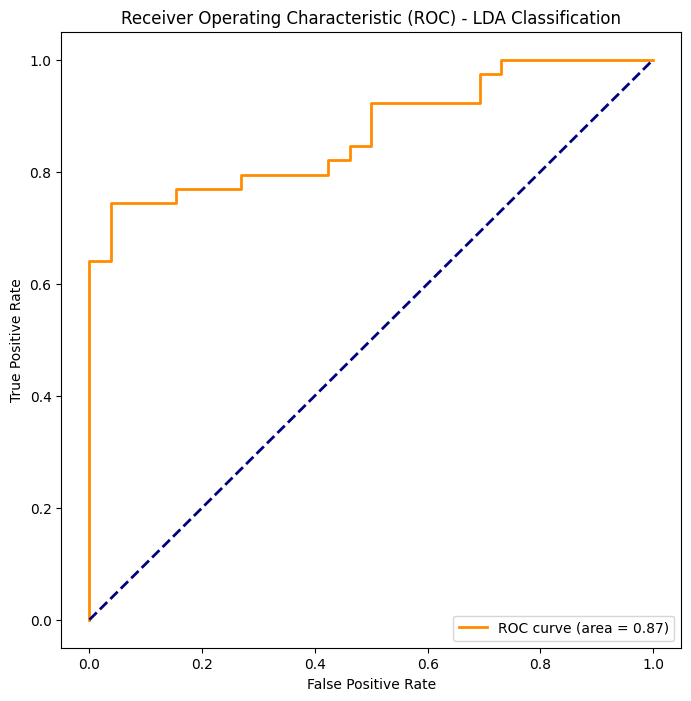

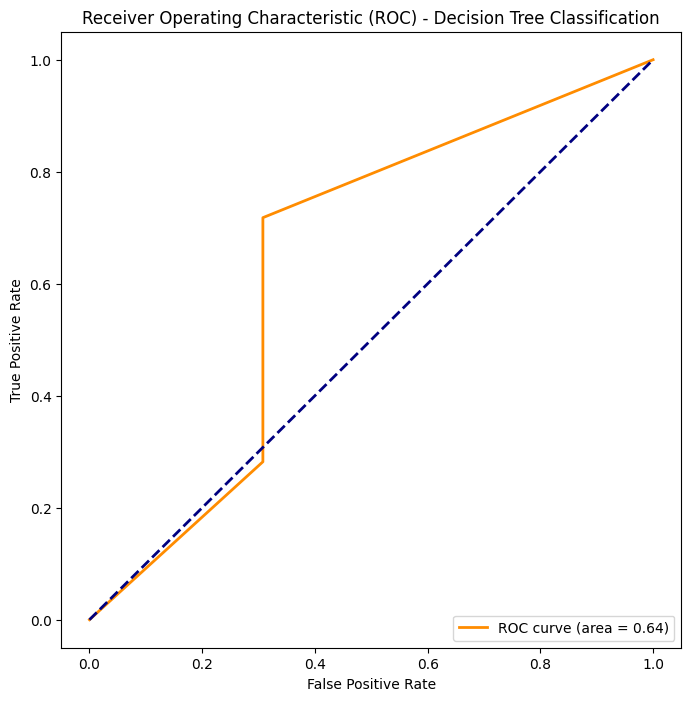

In [ ]:
clasification = Classifier(X_selected_train,X_selected_test,y_train,y_test)
d_svm = clasification.svm()
d_knn = clasification.knn()
d_lda = clasification.lda()
d_dt = clasification.decision_tree()

In [ ]:
svm = Classifier(X_selected_train,X_selected_test,y_train,y_test)
knn = Classifier(X_selected_train,X_selected_test,y_train,y_test)
lda = Classifier(X_selected_train,X_selected_test,y_train,y_test)
decision_tree = Classifier(X_selected_train,X_selected_test,y_train,y_test)
# MI regularizer
mi_knn = Saver(knn.knn(), 'MI', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_mi.xlsx')
mi_knn.save()

mi_lda = Saver(lda.lda(), 'MI', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_mi.xlsx')
mi_lda.save()

mi_dt = Saver(decision_tree.decision_tree(), 'MI', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_mi.xlsx')
mi_dt.save()

svm_dt = Saver(svm.svm(), 'MI', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_mi.xlsx')
svm_dt.save()



NameError: ignored

In [ ]:

# MI regularizer
mi_knn = Saver(knn.knn(), 'MI', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_mi.xlsx')
mi_knn.save()

mi_lda = Saver(lda.lda(), 'MI', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_mi.xlsx')
mi_lda.save()

mi_dt = Saver(decision_tree.decision_tree(), 'MI', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_mi.xlsx')
mi_dt.save()

svm_dt = Saver(svm.svm(), 'MI', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_mi.xlsx')
svm_dt.save()


NameError: ignored

In [ ]:
#Mutual Information
#path="/content/drive/MyDrive/Datasets/ReLink/Apache.csv"
path="/content/drive/MyDrive/Datasets/IDS_Datasets/nsl_kdd_cat_in_num.csv"
new_obj = DataPreprocessing(path)
x,y = new_obj.read_data()
print(type(x))
print(type(y))
# x=x.to_numpy()
# print(type(x))
y
x

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
41    object
42    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
1,0.0,1.0,1.0,1.0,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1.0
2,0.0,2.0,2.0,1.0,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1.0
3,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2.0
4,0.0,1.0,4.0,1.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.0
5,0.0,1.0,4.0,1.0,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148513,0.0,1.0,16.0,1.0,794.0,333.0,0.0,0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,1.0
148514,0.0,1.0,4.0,1.0,317.0,938.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,1.0
148515,0.0,1.0,4.0,1.0,54540.0,8314.0,0.0,0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,2.0
148516,0.0,2.0,12.0,1.0,42.0,42.0,0.0,0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.0


In [ ]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
# path="/content/drive/MyDrive/Datasets/ReLink/Apache.csv"
# data_preprocessor = DataPreprocessing(path)
discretized_data = DataPreprocessing.discretize(x, n_bins=5, strategy='uniform')
print(discretized_data)
print(type(discretized_data))


         0    1    2    3    4    5    6    7    8    9   ...   32   33   34  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  2.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  4.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  4.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
148512  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0  3.0  0.0   
148513  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  4.0  0.0   
148514  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  4.0  0.0   
148515  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  4.0  0.0   
148516  0.0  0.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         35   36   37   38   39   40   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 19 is constant and will be replaced with 0.
  warnings.warn(


In [ ]:
#discretized_data = DataPreprocessing.discretize(x, n_bins=5, strategy='uniform')
X_train, X_test, y_train, y_test = new_obj.split(discretized_data,y)
X_train_scaled,X_test_scaled = new_obj.standardization(X_train,X_test)
mi_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)

mi = mi_model.mutual_information()
#MI is an Numpy array,Convert the NumPy array to a Pandas Series
mi_series = pd.Series(mi, index=X_train.columns)
mi = mi_series
# threshold = 0.1

# # Select features with mutual information scores above the threshold
# selected_features = X_train.columns[mi > threshold]

               0         1         2         3        4         5         6   \
0       -0.077603 -0.438868  3.114714 -0.367393 -0.00589 -0.004103 -0.015625   
1       -0.077603 -0.438868 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
2       -0.077603  1.356696 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
3       -0.077603 -0.438868 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
4       11.697972 -0.438868 -0.497073  1.659496 -0.00589 -0.004103 -0.015625   
...           ...       ...       ...       ...      ...       ...       ...   
118808  -0.077603  1.356696 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
118809  -0.077603  1.356696 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
118810  -0.077603  1.356696 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
118811  -0.077603 -0.438868 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   
118812  -0.077603 -0.438868 -0.497073 -0.367393 -0.00589 -0.004103 -0.015625   

               7         8         9   

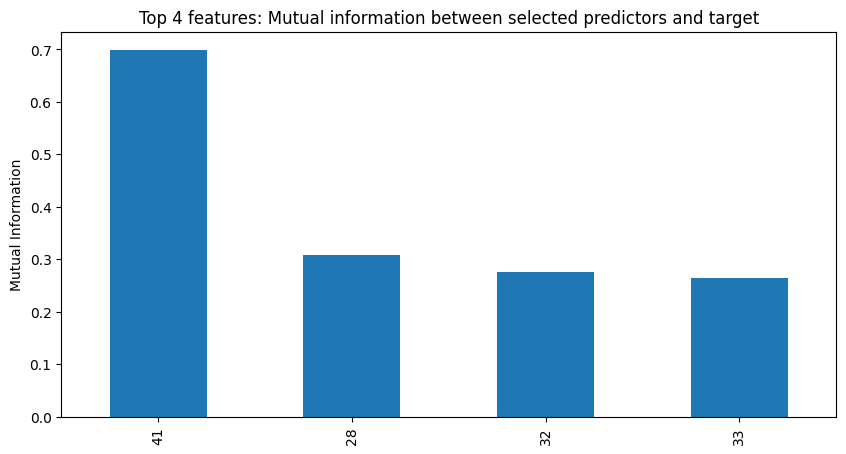

In [ ]:
# Sort mutual information scores in descending order
mi_sorted = mi.sort_values(ascending=False)

# Select the top 'components' features
# components = 7  # Set to your desired number of components
selected_features = mi_sorted.head(4).index

# Assuming X is  input features and y is  target variable
X_selected_train = X_train[selected_features]
X_selected_test=X_test[selected_features]
components=4

##Plot the sorted mutual information scores for selected features
mi_sorted[selected_features].plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title(f"Top {components} features: Mutual information between selected predictors and target")
plt.show()


# Plot the sorted mutual information scores
# mi_sorted.plot.bar(figsize=(10, 5))
# plt.ylabel('Mutual Information')
# plt.title("Mutual information between predictors and target")
# plt.show()

In [ ]:
mi.ndim

1

In [ ]:
X_selected_train

,41,28,32,33,11
21935,1.0,1.00,166.0,0.63,1.0
128004,1.0,1.00,255.0,1.00,1.0
10408,1.0,1.00,245.0,0.96,1.0
59705,2.0,0.02,17.0,0.07,0.0
59614,2.0,0.01,2.0,0.01,0.0
...,...,...,...,...,...
119880,2.0,0.02,4.0,0.02,0.0
103695,2.0,0.17,4.0,0.02,0.0
131933,1.0,1.00,124.0,0.49,1.0
146868,4.0,1.00,2.0,0.01,1.0


In [ ]:
print(type(mi))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Mutual information between predictors and target')

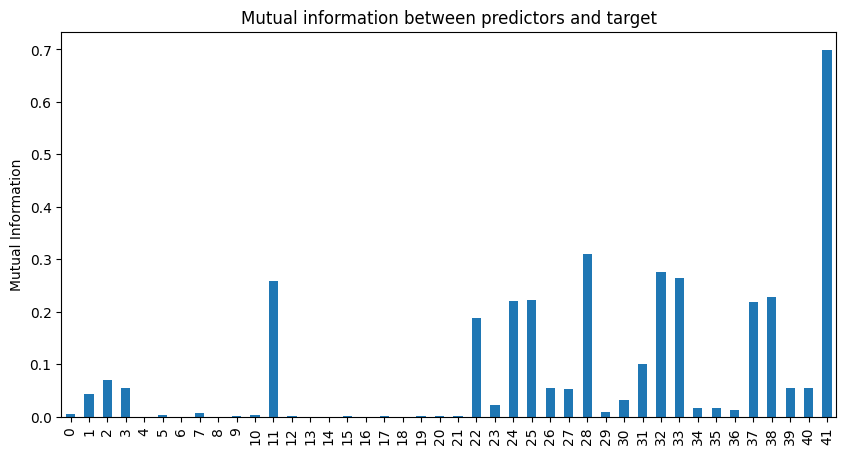

In [ ]:
mi = pd.Series(mi)
mi.plot.bar(figsize=(10, 5))
# mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [ ]:
print(type(X_selected_train))

<class 'pandas.core.frame.DataFrame'>


# MI BOX PLOT

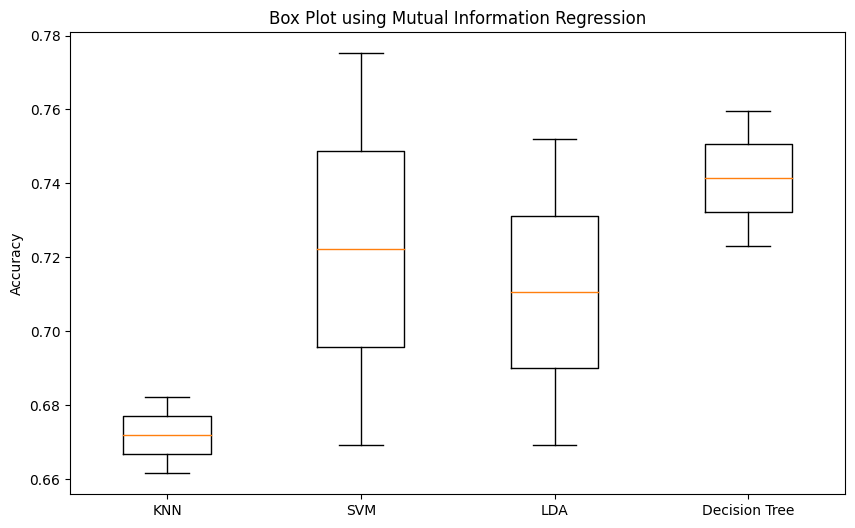

In [ ]:
# Create the classifier instance
clf = Classifier(X_selected_train, X_selected_test, y_train, y_test)
# Define models to include in cross-validation
models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(X_selected_train, y_train, models_to_cross_validate)

# Plot cross-validation box plot
# clf.plot_cross_val_boxplot(models_to_cross_validate)


# # Perform cross-validation and get scores
# cross_val_scores = clf.cross_validate_models(X_selected_train, y_train, models=models_to_cross_validate)
# cross_val_scores_=pd.DataFrame(cross_val_scores)
# cross_val_scores=cross_val_scores_

# Create a box plot of the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.columns)
plt.title('Box Plot using Mutual Information Regression')
plt.ylabel('Accuracy')
plt.show()

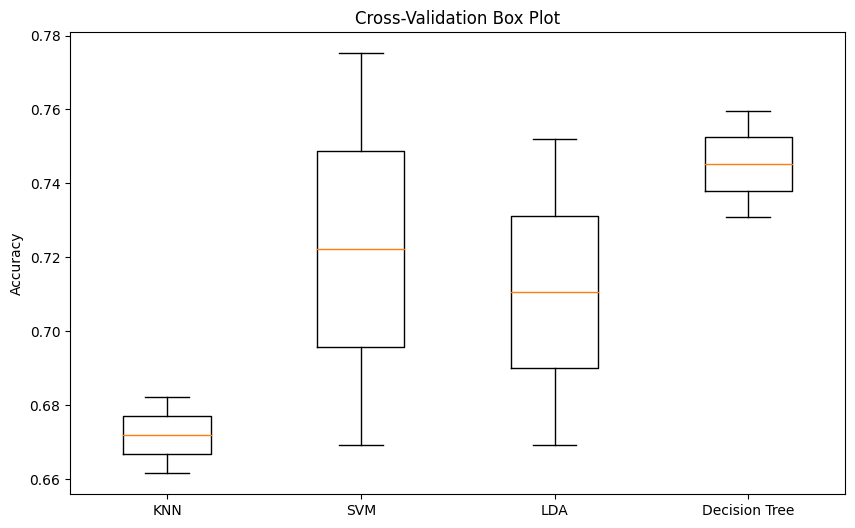

In [ ]:
# Assuming X_selected_train and X_selected_test are your features, and y_train and y_test are your target variables

# Create the classifier instance
clf = Classifier(X_selected_train, X_selected_test, y_train, y_test)

# Define models to include in cross-validation
models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(X_selected_train, y_train, models_to_cross_validate)

# Plot cross-validation box plot
clf.plot_cross_val_boxplot(models_to_cross_validate)


# # Perform cross-validation and get scores
# cross_val_scores = clf.cross_validate_models(X_selected_train, y_train, models=models_to_cross_validate)
# cross_val_scores_=pd.DataFrame(cross_val_scores)
# cross_val_scores=cross_val_scores_

# # Create a box plot of the cross-validation scores
# plt.figure(figsize=(10, 6))
# plt.boxplot(cross_val_scores.values, labels=cross_val_scores.columns)
# plt.title('Box Plot using Mutual Information Regression')
# plt.ylabel('Accuracy')
# plt.show()


# # ROC-AUC plot for each model
# for model_name, model in models_to_cross_validate:
#     probabilities = model.fit(X_selected_train, y_train).predict_proba(X_selected_test)[:, 1]
#     clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')



# # Radar plot for each model
# def plot_radar(self, results_dict, title_suffix=""):
#     categories = list(results_dict.index)
#     values = results_dict.values.flatten()

#     num_axes = len(categories)

#     # Compute angle of each axis
#     angles = np.linspace(0, 2 * np.pi, num_axes, endpoint=False).tolist()

#     # The plot is circular, so we need to "complete the loop" and append the start item at the end
#     values = np.concatenate((values, [values[0]]))
#     angles += angles[:1]

#     # Create radar plot
#     fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
#     ax.fill(angles, values, color='red', alpha=0.25, label='Accuracy')
#     ax.set_title(f'Radar Plot - {title_suffix}')
#     ax.set_yticklabels([])

#     plt.show()

# # Scatter plot for each model
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models(X_selected_train, y_train, [(model_name, model)])[model_name]
#     clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')

# plt.tight_layout()
# plt.show()


In [ ]:
# path = "/content/drive/MyDrive/Datasets/ReLink/Apache.csv"
# new_obj = Regularizer(path)
# # x_test=X_selected_train
# # y_train=
# X_selected_train, X_selected_test, y_train, y_test = new_obj.mutual_information(components=7)

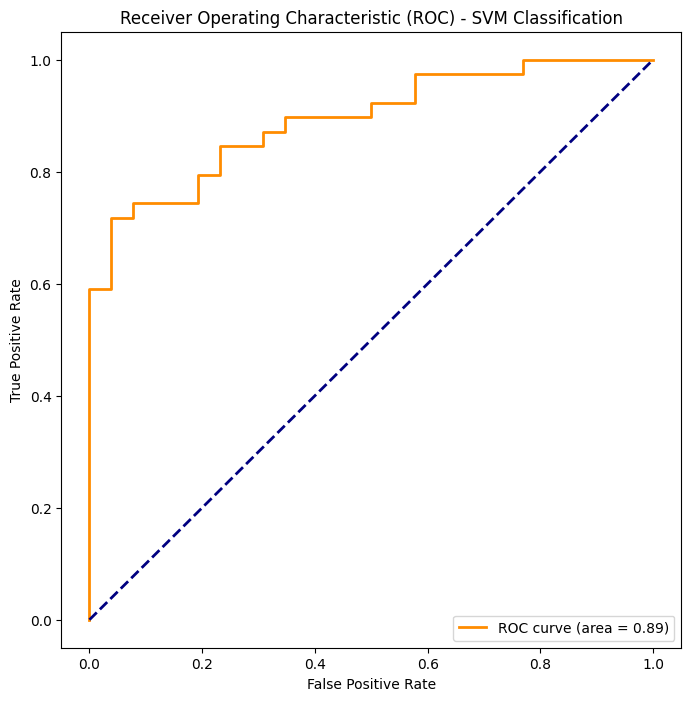

Results saved to /content/drive/MyDrive/Datasets/Results/svm_regularizers.xlsx


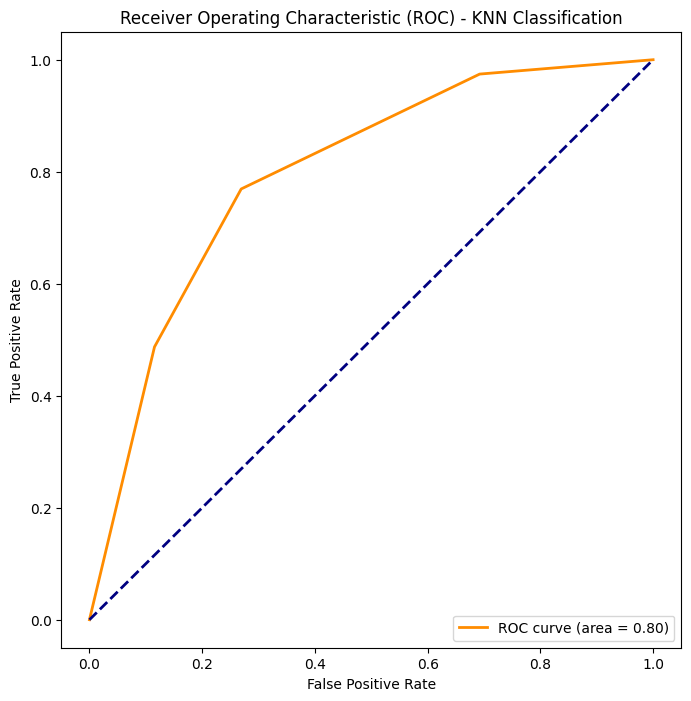

Results saved to /content/drive/MyDrive/Datasets/Results/knn_regularizers.xlsx


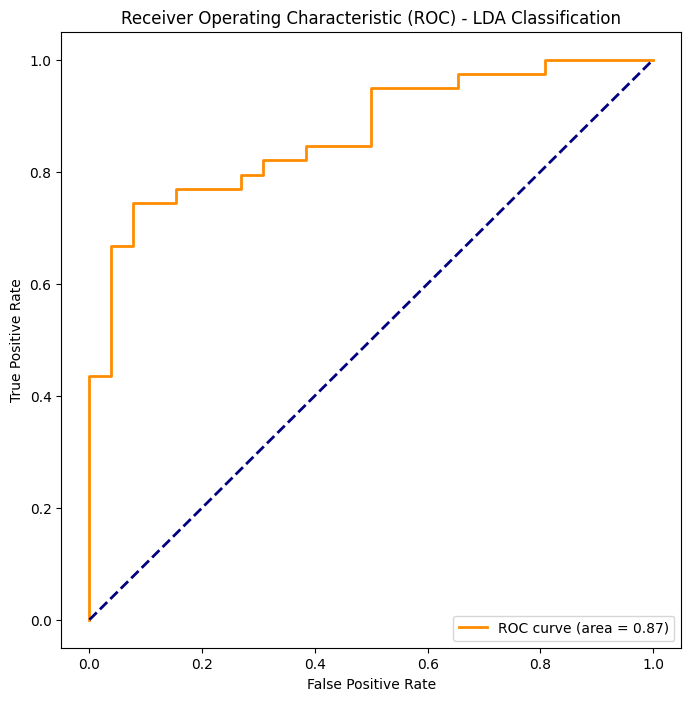

Results saved to /content/drive/MyDrive/Datasets/Results/lda_regularizers.xlsx


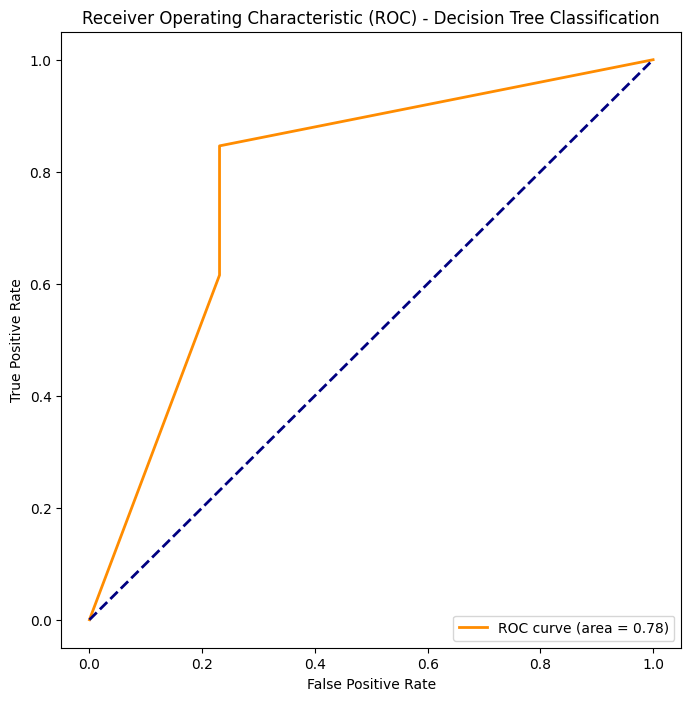

Results saved to /content/drive/MyDrive/Datasets/Results/dt_regularizers.xlsx


In [ ]:
# Assuming you have instances of your Classifier class named knn, lda, decision_tree
# clasification = Classifier(X_selected_train,X_selected_test,y_train,y_test)
svm = Classifier(X_selected_train,X_selected_test,y_train,y_test)
knn = Classifier(X_selected_train,X_selected_test,y_train,y_test)
lda = Classifier(X_selected_train,X_selected_test,y_train,y_test)
decision_tree = Classifier(X_selected_train,X_selected_test,y_train,y_test)


# d_svm = clasification.svm()
# d_knn = clasification.knn()
# d_lda = clasification.lda()
# d_dt = clasification.decision_tree()

# Function to save models with different regularizers
def save_model_with_regularizer(Classifier, reg_type, model_name, file_suffix):
    # base_path = 'C:\\Users\\iit\\Downloads\\'
    base_path = '/content/drive/MyDrive/Datasets/Results/'
    saver = Saver(Classifier(), reg_type, model_name, base_path + file_suffix)
    saver.save()
# MI regularizer
save_model_with_regularizer(svm.svm, 'MI', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'MI', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'MI', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'MI', 'Decision Tree', 'dt_regularizers.xlsx')

# **PLOTTERS**

In [ ]:
# Assuming you have instances of your Classifier class named knn, lda, decision_tree
svm = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
knn = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
lda = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
decision_tree = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)

# Function to save models with different regularizers
def save_model_with_regularizer(classifier, reg_type, model_name, file_suffix):
    # base_path = 'C:\\Users\\iit\\Downloads\\'
    base_path = '/content/drive/MyDrive/Datasets/Results/'
    saver = Saver(classifier(), reg_type, model_name, base_path + file_suffix)
    saver.save()

# Lasso regularizer
save_model_with_regularizer(svm.svm, 'Lasso', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'Lasso', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'Lasso', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'Lasso', 'Decision Tree', 'dt_regularizers.xlsx')

# Ridge regularizer
save_model_with_regularizer(svm.svm, 'Ridge', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'Ridge', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'Ridge', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'Ridge', 'Decision Tree', 'dt_regularizers.xlsx')

# PLS regularizer
save_model_with_regularizer(svm.svm, 'PLS', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'PLS', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'PLS', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'PLS', 'Decision Tree', 'dt_regularizers.xlsx')

# MI regularizer
save_model_with_regularizer(svm.svm, 'MI', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'MI', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'MI', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'MI', 'Decision Tree', 'dt_regularizers.xlsx')


NameError: ignored

In [ ]:
########PLOTTERS######################

In [ ]:
import pandas as pd

# Load the Excel files into DataFrames
svm_df = pd.read_excel("/content/drive/MyDrive/Results/svm_regularizers.xlsx", engine='openpyxl')
knn_df = pd.read_excel("/content/drive/MyDrive/Results/knn_regularizers.xlsx", engine='openpyxl')
lda_df = pd.read_excel("/content/drive/MyDrive/Results/lda_regularizers.xlsx", engine='openpyxl')
dt_df = pd.read_excel("/content/drive/MyDrive/Results/dt_regularizers.xlsx", engine='openpyxl')

# Extract necessary information for radar plot
def extract_radar_data(df):
    class_names = df['Classifier'].tolist()
    data = df[['Accuracy', 'Error', 'Precision', 'Recall', 'F-measure']].values.tolist()
    return class_names, data

svm_class_names, svm_data = extract_radar_data(svm_df)
knn_class_names, knn_data = extract_radar_data(knn_df)
lda_class_names, lda_data = extract_radar_data(lda_df)
dt_class_names, dt_data = extract_radar_data(dt_df)

# Now, svm_class_names, knn_class_names, lda_class_names, dt_class_names
# contain the class names, and svm_data, knn_data, lda_data, dt_data contain
# the corresponding data for the radar plot.


In [ ]:
svm_df = svm_df.drop_duplicates(subset=['Regularizer'])
svm_df

In [ ]:
knn_df = knn_df.drop_duplicates(subset=['Regularizer'])
knn_df

In [ ]:
lda_df = lda_df.drop_duplicates(subset=['Regularizer'])
lda_df

In [ ]:
# result_df = dt_df1.drop(columns=dt_df.columns[0])

In [ ]:
column_names = list(dt_df.columns.values)
column_names


In [ ]:
dt_df = dt_df.drop_duplicates(subset=['Regularizer'])
dt_df

In [ ]:
def radar_chart(df):
    df_modified = df.copy()
    df2 = df.drop_duplicates()
    df_modified = pd.concat([df_modified, df_modified.iloc[:, 0]], axis=1)

    # Number of metrics to display
    num_metrics = len(df_modified.axes[1])

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

    # Plot each classifier's performance
    plt.figure(figsize=(8, 8))
    for i, row in df_modified.iterrows():
        plt.polar(angles, row.tolist(), label=row['Regularizer'])  # Use 'Regularizer' as the label
        plt.fill(angles, row.tolist(), alpha=0.1)  # Fill the area under the curve with color for better visibility

    # Customize the plot
    plt.xticks(angles[:-1], df_modified.columns[:-1])
    plt.title('Radar Chart for Classifier Performance Metrics')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    # Show the plot
    plt.show()

In [ ]:
radar_chart(svm_df)

In [ ]:
radar_chart(knn_df)

In [ ]:
radar_chart(lda_df)

In [ ]:
radar_chart(dt_df)

In [ ]:
def radar_chart(df):
    df_modified = df.copy()
    df2=df.drop_duplicates()
    df_modified = pd.concat([df_modified, df_modified.iloc[:, 0]], axis=1)

    # Number of metrics to display
    num_metrics = len(df_modified.axes[1])

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

    # Plot each classifier's performance
    plt.figure(figsize=(8, 8))
    for i, row in df_modified.iterrows():
        plt.polar(angles, row.tolist(), label=i)
        plt.fill(angles, row.tolist(), alpha=0.1
        # Fill the area under the curve with color for better visibility
    )

    # Customize the plot
    plt.xticks(angles[:-1], df_modified.columns[:-1])
    plt.title('Radar Chart for Classifier Performance Metrics')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    # Show the plot
    plt.show()

radar_chart(dt_df)

# Box Plot


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

class Plotter:
    def __init__(self, X, y, model):
        self.X = X
        self.y = y
        self.model = model

    def cross_validate(self, cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42)):
        """
        Perform cross-validation and return the scores.

        Parameters:
        - cv: Cross-validation strategy (default is StratifiedKFold with 5 folds)

        Returns:
        - scores: Array of cross-validation scores
        """
        scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring='accuracy')  # You can change the scoring metric
        return scores

    def plot_boxplot(self, scores):
        """
        Create a box plot of the cross-validation scores.

        Parameters:
        - scores: Array of cross-validation scores

        Returns:
        - None (plots the box plot)
        """
        plt.figure(figsize=(8, 6))
        plt.boxplot(scores, vert=False)
        plt.title('Cross-Validation Box Plot')
        plt.xlabel('Accuracy')
        plt.show()

# Example usage:
# Assuming X is your features and y is your target variable
# Also assuming you have instantiated your classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier()

# Instantiate the Plotter class
plotter = Plotter(X_train, y, clf)

# Perform cross-validation
cv_scores = plotter.cross_validate()

# Plot the box plot
plotter.plot_boxplot(cv_scores)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(df):
    # Number of metrics to display
    num_metrics = len(df.columns) - 2  # Exclude 'Regularizer' and 'Classifier'

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

    # Melt the DataFrame to create a format suitable for box plot
    melted_df = df.melt(id_vars=['Regularizer', 'Classifier'], var_name='Metric', value_name='Value')

    # Create a box plot using Seaborn
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Metric', y='Value', hue='Regularizer', data=melted_df)
    plt.title('Box Plot for Classifier Performance Metrics')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    # Show the plot
    plt.show()

# Example usage
box_plot(dt_df)
box_plot(knn_df)
box_plot(lda_df)
box_plot(svm_df)

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def cross_validate_and_plot(df, model, num_folds=4):
    # Drop duplicates based on the "Regularizer" column
    df_modified = df.drop_duplicates(subset="Regularizer").copy()

    # Extract features (X) and target variable (y)
    X = df_modified.drop(['Regularizer', 'Classifier'], axis=1)
    y = df_modified['Regularizer']

    # Perform cross-validation
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    # Plot the accuracy for each fold
    plt.figure(figsize=(10, 6))
    plt.boxplot(scores, vert=False)
    plt.xlabel('Accuracy')
    plt.title('Cross-validated Accuracy for SVM Classifier')
    plt.show()

# Example usage
svm_model = SVC()
cross_validate_and_plot(dt_df, svm_model, num_folds=20)


In [ ]:
# #dt_df2=dt_df.drop_duplicates()
# radar_chart(dt_df)
# #radar_chart(dt_df)

In [ ]:
# def radar_chart(df):
#     # Drop duplicates based on the "Regularizer" column
#     df_modified = df.drop_duplicates(subset="Regularizer").copy()

#     # Number of metrics to display
#     num_metrics = len(df_modified.columns) - 2  # Exclude 'Regularizer' and 'Classifier'

#     # Compute angle of each axis
#     angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

#     # Plot each classifier's performance
#     plt.figure(figsize=(8, 8))
#     for i, row in df_modified.iterrows():
#         plt.polar(angles, row.tolist()[2:], label=row['Regularizer'])
#         plt.fill(angles, row.tolist()[2:], alpha=0.1)

#     # Customize the plot
#     plt.xticks(angles, df_modified.columns[2:])
#     plt.title('Radar Chart for Classifier Performance Metrics')
#     plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#     # Show the plot
#     plt.show()

# # Example usage



In [ ]:
# def radar_chart(df, dataset_name):
#     df_modified = df.copy()

#     # Number of metrics to display
#     num_metrics = len(df_modified.axes[1]) - 2  # Exclude 'Regularizer' and 'Classifier'

#     # Compute angle of each axis
#     angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

#     # Plot each classifier's performance
#     plt.figure(figsize=(8, 8))
#     for i, row in df_modified.iterrows():
#         plt.polar(angles, row.tolist()[2:], label=row['Regularizer'])

#         # Fill the area under the curve with color for better visibility
#         plt.fill(angles, row.tolist()[2:], alpha=0.1)

#     # Customize the plot
#     plt.xticks(angles, df_modified.columns[2:])
#     plt.title(f'Radar Chart for Various Regularization on {dataset_name} Classifiers Performance ')

#     # Create a manual legend
#     handles, labels = plt.gca().get_legend_handles_labels()
#     unique_labels = list(set(labels))
#     unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5, label=label) for label in unique_labels]
#     plt.legend(handles=unique_handles, labels=unique_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

#     # Show the plot
#     plt.show()

# # Example usage
# radar_chart(svm_df, "SVM")


In [ ]:
# transposed_df = svm_df.set_index('Regularizer').transpose()
# print(svm_df)
# svm_df

In [ ]:
# svm_df.drop(svm_df.tail(1).index,inplace=True) # drop last n rows

In [ ]:
# svm_df

In [ ]:
# print(type(svm_df))

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming svm_df is your DataFrame
# svm_df = pd.DataFrame({
#     'Regularizer': ['Lasso', 'Ridge', 'PLS', 'MI'],
#     'Accuracy': [0.584615, 0.584615, 0.584615, 0.584615],
#     'Error': [0.415385, 0.415385, 0.415385, 0.415385],
#     'Precision': [0.604167, 0.604167, 0.604167, 0.604167],
#     'Recall': [0.783784, 0.783784, 0.783784, 0.783784],
#     'F-measure': [0.682353, 0.682353, 0.682353, 0.682353],
#     'Classifier': ['SVM', 'SVM', 'SVM', 'SVM']
# })

# # Extracting data for SVM classifier
# svm_data = svm_df.set_index('Regularizer').drop('Classifier', axis=1).transpose()

# # Define colors
# colors = ['red', 'blue', 'green', 'purple']

# # Plotting radar chart
# labels = list(svm_data.index)
# num_vars = len(labels)

# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # The plot is circular, so we need to "complete the loop" and append the start
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# for i, (idx, row) in enumerate(svm_data.iterrows()):
#     values = row.tolist()
#     values += values[:1]
#     ax.fill(angles, values, alpha=0.5, label=f'{idx} (Accuracy)', color=colors[i % len(colors)])  # Use modulo to cycle through colors

# # Darken the plot
# ax.set_facecolor((0, 0, 0, 0))
# ax.grid(True, linestyle='dotted', linewidth=0.8)

# ax.set_yticklabels([])
# ax.set_xticks(angles)
# ax.set_xticklabels(labels)
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Add a title
# ax.set_title('Radar Plot for SVM Classifier')

# plt.show()


In [ ]:
# #RUNNING
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming svm_df is your DataFrame
# svm_df = pd.DataFrame({
#     'Regularizer': ['Lasso', 'Ridge', 'PLS', 'MI'],
#     'Accuracy': [0.584615, 0.584615, 0.584615, 0.584615],
#     'Error': [0.415385, 0.415385, 0.415385, 0.415385],
#     'Precision': [0.604167, 0.604167, 0.604167, 0.604167],
#     'Recall': [0.783784, 0.783784, 0.783784, 0.783784],
#     'F-measure': [0.682353, 0.682353, 0.682353, 0.682353],
#     'Classifier': ['SVM', 'SVM', 'SVM', 'SVM']
# })

# # Extracting data for SVM classifier
# svm_data = svm_df.set_index('Regularizer').drop('Classifier', axis=1).transpose()

# # Plotting radar chart
# labels = list(svm_data.index)
# num_vars = len(labels)

# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # The plot is circular, so we need to "complete the loop" and append the start
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# for idx, row in svm_data.iterrows():
#     values = row.tolist()
#     values += values[:1]
#     ax.fill(angles, values, alpha=0.25, label=idx)

# ax.set_yticklabels([])
# ax.set_xticks(angles)
# ax.set_xticklabels(labels)
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Add a title
# ax.set_title('Radar Plot for SVM Classifier')

# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming svm_df is your DataFrame
# svm_df = pd.DataFrame({
#     'Regularizer': ['Lasso', 'Ridge', 'PLS', 'MI'],
#     'Accuracy': [0.584615, 0.584615, 0.584615, 0.584615],
#     'Error': [0.415385, 0.415385, 0.415385, 0.415385],
#     'Precision': [0.604167, 0.604167, 0.604167, 0.604167],
#     'Recall': [0.783784, 0.783784, 0.783784, 0.783784],
#     'F-measure': [0.682353, 0.682353, 0.682353, 0.682353],
#     'Classifier': ['SVM', 'SVM', 'SVM', 'SVM']
# })

# # Extracting data for SVM classifier
# svm_data = svm_df.set_index('Regularizer').drop(['Classifier', 'Error'], axis=1).transpose()

# # Define colors
# colors = ['red', 'blue', 'green', 'purple']

# # Plotting radar charts for accuracy, precision, recall, and F-score
# metrics = list(svm_data.columns)

# for metric in metrics:
#     fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

#     for i, (idx, row) in enumerate(svm_data.iterrows()):
#         values = row.tolist()
#         values += [values[0]]
#         angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
#         ax.fill(angles, values, alpha=0.5, label=f'{idx} ({metric})', color=colors[i % len(colors)])

#     ax.set_facecolor((0, 0, 0, 0))
#     ax.grid(True, linestyle='dotted', linewidth=0.8)

#     ax.set_yticklabels([])
#     ax.set_xticks(angles)
#     ax.set_xticklabels([f'{idx} ({metric})' for idx in svm_data.index])  # Use labels with metric
#     ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#     ax.set_title(f'Radar Plot for SVM Classifier ({metric})')

# plt.show()


In [ ]:
#